# **Airline Delay Analysis and Prediction**

We are utilizing the **"Airline On-Time Performance Dataset"** maintained by the U.S. Department of Transportation's 
Bureau of Transportation Statistics (BTS) to analyze and predict airline delays.

Dataset link: [Airline On-Time Performance Dataset](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr)

This dataset includes detailed flight information such as scheduling, performance metrics, delay factors, taxi times, 
flight durations, distances, cancellations, and diversions. It enables comprehensive analysis of flight frequencies, 
route patterns, delays, and ground operations efficiency. With this data, stakeholders can identify common causes of 
delays, evaluate airline and airport performance, and understand the impact of cancellations and diversions. 
These insights can help airlines, airports, and regulatory authorities make informed decisions to improve air transportation 
efficiency and performance.

**Data Overview:**

Timeframe: Januray 2024 to July 2024 

Records: 4,095,932

Columns: 110

*Importing necessary libraries and packages*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
from datetime import datetime

# Suppressing both FutureWarning and DtypeWarning
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

In [2]:
from scipy import stats

# load packages into notebook
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, mean_squared_error,r2_score, mean_absolute_error

**Data Understanding and Preparation**

The dataset contains various flight details, including scheduling, performance metrics, and delay factors. To ensure that our dataset is ready for machine learning modeling, we will begin by loading and exploring the data, checking for any issues like missing values, outliers, or redundant columns.

**Steps for Data Preprocessing:**

Data Importing: Load the monthly datasets for Januray 2024 to July 2024.
Concatenation: Combine the monthly datasets into a single dataset.
Initial Exploration: Print the first few rows to inspect the structure and quality of the data.
These steps are crucial for ensuring the dataset is in a usable form for further analysis and modeling.

In [3]:
df_jan = pd.read_csv('/Users/rushabh/Documents/AirlineDelay/January.csv')
df_feb = pd.read_csv('/Users/rushabh/Documents/AirlineDelay/February.csv')
df_mar = pd.read_csv('/Users/rushabh/Documents/AirlineDelay/March.csv')
df_apr = pd.read_csv('/Users/rushabh/Documents/AirlineDelay/April.csv')
df_may = pd.read_csv('/Users/rushabh/Documents/AirlineDelay/May.csv')
df_jun = pd.read_csv('/Users/rushabh/Documents/AirlineDelay/June.csv')
df_jul = pd.read_csv('/Users/rushabh/Documents/AirlineDelay/July.csv')

In [4]:
print(df_jan.shape)
df_jan.head()

(547271, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,1,1,8,1,2024-01-08,9E,20363,9E,N485PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,1,1,9,2,2024-01-09,9E,20363,9E,N912XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,1,1,10,3,2024-01-10,9E,20363,9E,N918XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,1,1,11,4,2024-01-11,9E,20363,9E,N490PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,1,1,12,5,2024-01-12,9E,20363,9E,N915XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df_feb.shape)
df_feb.head()

(519221, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,1,2,17,6,2024-02-17,9E,20363,9E,N922XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,1,2,17,6,2024-02-17,9E,20363,9E,N922XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,1,2,1,4,2024-02-01,9E,20363,9E,N920XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,1,2,2,5,2024-02-02,9E,20363,9E,N482PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,1,2,5,1,2024-02-05,9E,20363,9E,N479PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df_mar.shape)
df_mar.head()

(591767, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,1,3,1,5,2024-03-01,9E,20363,9E,N935XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,1,3,2,6,2024-03-02,9E,20363,9E,N910XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,1,3,3,7,2024-03-03,9E,20363,9E,N298PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,1,3,4,1,2024-03-04,9E,20363,9E,N602LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,1,3,5,2,2024-03-05,9E,20363,9E,N348PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(df_apr.shape)
df_apr.head()

(582185, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,2,4,1,1,2024-04-01,9E,20363,9E,N187GJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,2,4,2,2,2024-04-02,9E,20363,9E,N297PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,2,4,3,3,2024-04-03,9E,20363,9E,N605LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,2,4,4,4,2024-04-04,9E,20363,9E,N912XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,2,4,5,5,2024-04-05,9E,20363,9E,N538CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df_may.shape)
df_may.head()

(609743, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,2,5,1,3,2024-05-01,9E,20363,9E,N491PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,2,5,2,4,2024-05-02,9E,20363,9E,N482PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,2,5,3,5,2024-05-03,9E,20363,9E,N920XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,2,5,4,6,2024-05-04,9E,20363,9E,N932XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,2,5,5,7,2024-05-05,9E,20363,9E,N479PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(df_jun.shape)
df_jun.head()

(611132, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,2,6,7,5,2024-06-07,9E,20363,9E,N272PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,2,6,8,6,2024-06-08,9E,20363,9E,N302PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,2,6,9,7,2024-06-09,9E,20363,9E,N676CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,2,6,10,1,2024-06-10,9E,20363,9E,N301PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,2,6,11,2,2024-06-11,9E,20363,9E,N335PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(df_jul.shape)
df_jul.head()

(634613, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,3,7,1,1,2024-07-01,9E,20363,9E,N935XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,3,7,2,2,2024-07-02,9E,20363,9E,N335PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,3,7,3,3,2024-07-03,9E,20363,9E,N337PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,3,7,4,4,2024-07-04,9E,20363,9E,N272PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,3,7,5,5,2024-07-05,9E,20363,9E,N146PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dfs = [df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul]
df = pd.concat(dfs, ignore_index=True)

In [12]:
print(df.shape)
df.head()

(4095932, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2024,1,1,8,1,2024-01-08,9E,20363,9E,N485PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,1,1,9,2,2024-01-09,9E,20363,9E,N912XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,1,1,10,3,2024-01-10,9E,20363,9E,N918XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024,1,1,11,4,2024-01-11,9E,20363,9E,N490PX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,1,1,12,5,2024-01-12,9E,20363,9E,N915XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*We create a list of columns and create a Dataframe which have useful information for analysis and prediction.*

In [13]:
# Create list of columns which are useful for analysis and prediction
col = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Flight_Number_Reporting_Airline', 'Tail_Number', 'Origin', 'Dest', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'TaxiOut', 'DepartureDelayGroups', 'DepDelayMinutes', 'ArrTime', 'CRSArrTime', 'ArrDelay', 'TaxiIn', 'ArrivalDelayGroups', 'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Cancelled', 'CancellationCode', 'Diverted']

In [14]:
df = df[col]
print(df.shape)
df.head()

(4095932, 35)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
0,2024,1,8,1,2024-01-08,9E,4801,N485PX,LGA,OMA,...,213.0,184.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
1,2024,1,9,2,2024-01-09,9E,4801,N912XJ,LGA,OMA,...,196.0,168.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
2,2024,1,10,3,2024-01-10,9E,4801,N918XJ,LGA,OMA,...,200.0,177.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
3,2024,1,11,4,2024-01-11,9E,4801,N490PX,LGA,OMA,...,223.0,188.0,0.0,0.0,4.0,0.0,23.0,0.0,NaN,0.0
4,2024,1,12,5,2024-01-12,9E,4801,N915XJ,LGA,OMA,...,226.0,185.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0


*A function is created to show information on dataset*

In [15]:
def get_df_info(df):
    print('Dataframe Shape:', df.shape)

    # Create a list of DataFrames to concatenate
    info_dfs = [
        pd.DataFrame(df.dtypes).T.rename(index={0: 'column type'}),
        pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'null values:'}),
        pd.DataFrame(df.isnull().sum() / df.shape[0] * 100).T.rename(index={0: 'null values (%)'})
    ]
    
    df_info = pd.concat(info_dfs, axis=0)
    
    return df_info

In [16]:
get_df_info(df)

Dataframe Shape: (4095932, 35)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
column type,int64,int64,int64,int64,object,object,int64,object,object,object,...,float64,float64,float64,float64,float64,float64,float64,float64,object,float64
null values:,0,0,0,0,0,0,0,13850,0,0,...,78529,78529,3165422,3165422,3165422,3165422,3165422,0,4028894,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.33814,0.0,0.0,...,1.917244,1.917244,77.282094,77.282094,77.282094,77.282094,77.282094,0.0,98.363303,0.0


In [17]:
df.describe(include = 'all')

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
count,4095932.0,4.095932e+06,4.095932e+06,4.095932e+06,4095932,4095932,4.095932e+06,4082082,4095932,4095932,...,4.017403e+06,4.017403e+06,930510.000000,930510.000000,930510.000000,930510.00000,930510.000000,4.095932e+06,67038,4.095932e+06
unique,NaN,NaN,NaN,NaN,213,15,NaN,5941,344,344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,2024-07-19,WN,NaN,N488HA,ATL,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,NaN
freq,NaN,NaN,NaN,NaN,21468,840402,NaN,1969,197317,197236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34220,NaN
mean,2024.0,4.113240e+00,1.579195e+01,3.958883e+00,NaN,NaN,2.479611e+03,NaN,NaN,NaN,...,1.420916e+02,1.159385e+02,24.757927,4.504423,13.897418,0.13632,30.491383,1.636697e-02,NaN,2.805466e-03
std,0.0,1.995333e+00,8.780413e+00,2.005959e+00,NaN,NaN,1.647358e+03,NaN,NaN,NaN,...,7.268818e+01,7.064225e+01,76.621005,34.323884,32.818808,3.42842,65.236528,1.268822e-01,NaN,5.289231e-02
min,2024.0,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,1.000000e+00,NaN,NaN,NaN,...,1.500000e+01,6.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,NaN,0.000000e+00
25%,2024.0,2.000000e+00,8.000000e+00,2.000000e+00,NaN,NaN,1.140000e+03,NaN,NaN,NaN,...,8.900000e+01,6.400000e+01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,NaN,0.000000e+00
50%,2024.0,4.000000e+00,1.600000e+01,4.000000e+00,NaN,NaN,2.194000e+03,NaN,NaN,NaN,...,1.260000e+02,9.900000e+01,3.000000,0.000000,1.000000,0.00000,5.000000,0.000000e+00,NaN,0.000000e+00
75%,2024.0,6.000000e+00,2.300000e+01,6.000000e+00,NaN,NaN,3.683000e+03,NaN,NaN,NaN,...,1.730000e+02,1.460000e+02,21.000000,0.000000,17.000000,0.00000,36.000000,0.000000e+00,NaN,0.000000e+00


In [18]:
df[['CRSDepTime', 'DepTime', 'CRSArrTime', 'ArrTime']]

,CRSDepTime,DepTime,CRSArrTime,ArrTime
0,856,851.0,1135,1124.0
1,856,851.0,1135,1107.0
2,856,850.0,1135,1110.0
3,856,919.0,1135,1202.0
4,856,851.0,1135,1137.0
...,...,...,...,...
4095927,2105,NaN,2240,NaN
4095928,1425,1532.0,1637,1754.0
4095929,1355,1354.0,1600,1535.0
4095930,1830,1840.0,2048,2151.0


*We have created a function to validate data to integer and then to string. This will help us convert 24hr (HHMM) time into 12hr format (HH:MM AM/PM).*

In [19]:
def validate_int2str(col):
    try:
        if col:
            col = int(float(col))
            if (col):
                col = str(col).zfill(4)
                col = datetime.strptime(col, '%H%M').time().strftime("%I:%M %p")
            return col
        else:
            return np.nan
    except Exception as e:
        return np.nan

In [20]:
df['CRSDepTime'] = df['CRSDepTime'].apply(lambda x: validate_int2str(x))
df['DepTime'] = df['DepTime'].apply(lambda x: validate_int2str(x))
df['CRSArrTime'] = df.CRSArrTime.apply(lambda x: validate_int2str(x))
df['ArrTime'] = df.ArrTime.apply(lambda x: validate_int2str(x))

In [21]:
# Verify the result after applying the function
df[['CRSDepTime', 'DepTime', 'CRSArrTime', 'ArrTime']]

,CRSDepTime,DepTime,CRSArrTime,ArrTime
0,08:56 AM,08:51 AM,11:35 AM,11:24 AM
1,08:56 AM,08:51 AM,11:35 AM,11:07 AM
2,08:56 AM,08:50 AM,11:35 AM,11:10 AM
3,08:56 AM,09:19 AM,11:35 AM,12:02 PM
4,08:56 AM,08:51 AM,11:35 AM,11:37 AM
...,...,...,...,...
4095927,09:05 PM,NaN,10:40 PM,NaN
4095928,02:25 PM,03:32 PM,04:37 PM,05:54 PM
4095929,01:55 PM,01:54 PM,04:00 PM,03:35 PM
4095930,06:30 PM,06:40 PM,08:48 PM,09:51 PM


**We are creating different dataframes based on different flight status being observed in the current dataset**

1.   Cancelled Flights (Cancelled == 1)
2.   Diverted Flights (Diverted == 1)
3.   Delayed Flights (ArrivalDelayGroups >= 1)
4.   On Time Flights (ArrivalDelayGroups == 0)
5.   Early Flights (ArrivalDelayGroups < 0)

In [22]:
print(df['Cancelled'].unique())

[0. 1.]


In [23]:
df['Cancelled'] = df['Cancelled'].astype(float).astype(int)

### **Cancelled Dataframe**

In [24]:
# filter cancelled flight data
df_cancelled = df[df.Cancelled == 1]
# removing cancelled flights from original dataframe
df = df[~(df.Cancelled == 1)]
# printing number of canceled flights
print("Canceled Flight Count:", df_cancelled.shape[0])

df_cancelled.head()

Canceled Flight Count: 67038


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
6,2024,1,16,2,2024-01-16,9E,4801,N485PX,LGA,OMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B,0.0
23,2024,1,15,1,2024-01-15,9E,4801,N485PX,OMA,LGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B,0.0
60,2024,1,16,2,2024-01-16,9E,4802,N916XJ,MCI,LGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B,0.0
63,2024,1,19,5,2024-01-19,9E,4802,N922XJ,MCI,LGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B,0.0
99,2024,1,15,1,2024-01-15,9E,4805,N300PQ,LGA,JAX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,C,0.0


In [25]:
df_cancelled.CancellationCode.fillna(value = 'UNKNOWN', axis = 0, inplace = True)

In [26]:
get_df_info(df_cancelled)

Dataframe Shape: (67038, 35)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
column type,int64,int64,int64,int64,object,object,int64,object,object,object,...,float64,float64,float64,float64,float64,float64,float64,int64,object,float64
null values:,0,0,0,0,0,0,0,13850,0,0,...,67038,67038,67038,67038,67038,67038,67038,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.659924,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0


In [27]:
df['Diverted'] = df['Diverted'].astype(float).astype(int)

### **Diverted Dataframe**

In [28]:
# filter filght data
df_diverted = df[df.Diverted == 1]
# This code is filtering out (removing) rows from a Pandas DataFrame df where the value in the 'Diverted' column is equal to 1.
df = df[~(df.Diverted == 1)]
# print number of  flights
print("Diverted flights count:", df_diverted.shape[0])

df_diverted.head()

Diverted flights count: 11491


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
1243,2024,1,9,2,2024-01-09,9E,4900,N186GJ,BTR,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
2066,2024,1,9,2,2024-01-09,9E,4923,N187GJ,MEM,LGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
2126,2024,1,9,2,2024-01-09,9E,4926,N909XJ,STL,LGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
2300,2024,1,24,3,2024-01-24,9E,4930,N301PQ,ATL,GSP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
2495,2024,1,9,2,2024-01-09,9E,4937,N398CA,MLI,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1


In [29]:
get_df_info(df_diverted)

Dataframe Shape: (11491, 35)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
column type,int64,int64,int64,int64,object,object,int64,object,object,object,...,float64,float64,float64,float64,float64,float64,float64,int64,object,int64
null values:,0,0,0,0,0,0,0,0,0,0,...,11491,11491,11491,11491,11491,11491,11491,0,11491,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,0.0


**Diveretd and Cancelled are dropped from Normal flights dataframe**

### **Normal Flights Spearated dataframe**

In [30]:
get_df_info(df)

Dataframe Shape: (4017403, 35)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
column type,int64,int64,int64,int64,object,object,int64,object,object,object,...,float64,float64,float64,float64,float64,float64,float64,int64,object,int64
null values:,0,0,0,0,0,0,0,0,0,0,...,0,0,3086893,3086893,3086893,3086893,3086893,0,4017403,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,76.838022,76.838022,76.838022,76.838022,76.838022,0.0,100.0,0.0


In [31]:
# Replace empty cells with 0
df.fillna(value = 0, axis = 0, inplace = True)

In [32]:
get_df_info(df)

Dataframe Shape: (4017403, 35)


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
column type,int64,int64,int64,int64,object,object,int64,object,object,object,...,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
null values:,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
flights_column = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Flight_Number_Reporting_Airline', 'Tail_Number', 'Origin', 'Dest', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'TaxiOut', 'DepartureDelayGroups', 'DepDelayMinutes', 'ArrTime', 'CRSArrTime', 'ArrDelay', 'TaxiIn', 'ArrivalDelayGroups', 'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [34]:
df_flights = df[flights_column]
df_flights.dtypes

Year                                 int64
Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
FlightDate                          object
Reporting_Airline                   object
Flight_Number_Reporting_Airline      int64
Tail_Number                         object
Origin                              object
Dest                                object
Distance                           float64
DistanceGroup                        int64
DepTime                             object
CRSDepTime                          object
DepDelay                           float64
TaxiOut                            float64
DepartureDelayGroups               float64
DepDelayMinutes                    float64
ArrTime                             object
CRSArrTime                          object
ArrDelay                           float64
TaxiIn                             float64
ArrivalDelayGroups                 float64
ArrDelayMin

In [35]:
df['Distance'] = df['Distance'].astype(int)
df['DepDelay'] = df['DepDelay'].astype(int)
df['TaxiOut'] = df['TaxiOut'].astype(int)
df['DepartureDelayGroups'] = df['DepartureDelayGroups'].astype(int)
df['DepDelayMinutes'] = df['DepDelayMinutes'].astype(int)
df['ArrDelay'] = df['ArrDelay'].astype(int)
df['TaxiIn'] = df['TaxiIn'].astype(int)
df['ArrivalDelayGroups'] = df['ArrivalDelayGroups'].astype(int)
df['ArrDelayMinutes'] = df['ArrDelayMinutes'].astype(int)
df['CRSElapsedTime'] = df['CRSElapsedTime'].astype(int)
df['ActualElapsedTime'] = df['ActualElapsedTime'].astype(int)
df['AirTime'] = df['AirTime'].astype(int)
df['CarrierDelay'] = df['CarrierDelay'].astype(int)
df['WeatherDelay'] = df['WeatherDelay'].astype(int)
df['NASDelay'] = df['NASDelay'].astype(int)
df['SecurityDelay'] = df['SecurityDelay'].astype(int)
df['LateAircraftDelay'] = df['LateAircraftDelay'].astype(int)

### **Delayed Flights Dataframe**

In [36]:
df_delayed = df[df.ArrivalDelayGroups >= 1]
print("Delayed flights count:", df_delayed.shape[0])
df_delayed.head()

Delayed flights count: 930512


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
3,2024,1,11,4,2024-01-11,9E,4801,N490PX,LGA,OMA,...,223,188,0,0,4,0,23,0,0,0
7,2024,1,17,3,2024-01-17,9E,4801,N482PX,LGA,OMA,...,223,186,27,0,4,0,0,0,0,0
19,2024,1,9,2,2024-01-09,9E,4801,N912XJ,OMA,LGA,...,215,160,0,0,43,0,0,0,0,0
22,2024,1,12,5,2024-01-12,9E,4801,N915XJ,OMA,LGA,...,186,142,0,8,22,0,2,0,0,0
24,2024,1,16,2,2024-01-16,9E,4801,N485PX,OMA,LGA,...,157,137,71,0,87,0,19,0,0,0


### **On Time flights Dataframe**

In [37]:
df_ontime = df[df.ArrivalDelayGroups == 0]
print("Ontime flights count:", df_ontime.shape[0])
df_ontime.head()

Ontime flights count: 709867


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
4,2024,1,12,5,2024-01-12,9E,4801,N915XJ,LGA,OMA,...,226,185,0,0,0,0,0,0,0,0
5,2024,1,15,1,2024-01-15,9E,4801,N485PX,LGA,OMA,...,206,187,0,0,0,0,0,0,0,0
21,2024,1,11,4,2024-01-11,9E,4801,N490PX,OMA,LGA,...,158,127,0,0,0,0,0,0,0,0
39,2024,1,11,4,2024-01-11,9E,4802,N924XJ,LGA,MCI,...,217,187,0,0,0,0,0,0,0,0
50,2024,1,26,5,2024-01-26,9E,4802,N919XJ,LGA,MCI,...,220,177,0,0,0,0,0,0,0,0


### **Early flights Dataframe**

In [38]:
df_early = df[df.ArrivalDelayGroups < 0]
print("Early flights count:", df_early.shape[0])
df_early.head()

Early flights count: 2377024


,Year,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,Tail_Number,Origin,Dest,...,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode,Diverted
0,2024,1,8,1,2024-01-08,9E,4801,N485PX,LGA,OMA,...,213,184,0,0,0,0,0,0,0,0
1,2024,1,9,2,2024-01-09,9E,4801,N912XJ,LGA,OMA,...,196,168,0,0,0,0,0,0,0,0
2,2024,1,10,3,2024-01-10,9E,4801,N918XJ,LGA,OMA,...,200,177,0,0,0,0,0,0,0,0
8,2024,1,18,4,2024-01-18,9E,4801,N133EV,LGA,OMA,...,213,180,0,0,0,0,0,0,0,0
9,2024,1,19,5,2024-01-19,9E,4801,N182GJ,LGA,OMA,...,188,166,0,0,0,0,0,0,0,0


# **Data Visualization**

**Number of Flights by Reporting Airline**

This chart shows the number of flights operated by each airline, as indicated by the column *'Reporting_Airline'*, which contains the airline codes. The dataset includes all flights within the United States.

1. 9E - Endeavor Air (Delta Connection)
2. AA - American Airlines
3. AS - Alaska Airlines
4. B6 - JetBlue Airways
5. DL - Delta Air Lines
6. F9 - Frontier Airlines
7. G4 - Allegiant Air
8. HA - Hawaiian Airlines
9. MQ - Envoy Air (American Eagle)
10. NK - Spirit Airlines
11. WN - Southwest Airlines
12. YX - Republic Airways
13. OH - PSA Airlines (American Eagle)
14. OO - SkyWest Airlines
15. UA - United Airlines

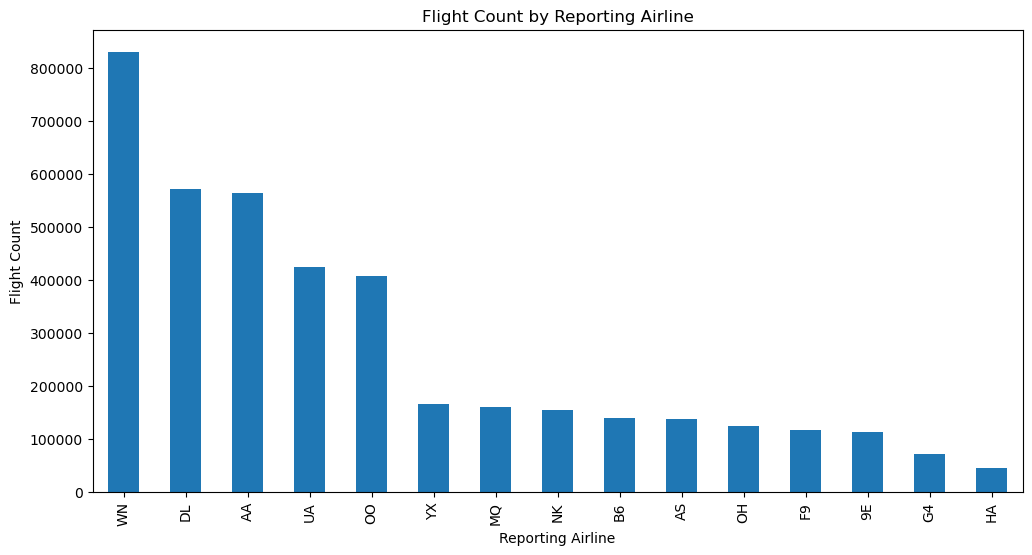

In [39]:
plt.figure(figsize=(12, 6))
df["Reporting_Airline"].value_counts().plot(kind = 'bar')
plt.title("Flight Count by Reporting Airline")
plt.xlabel("Reporting Airline")
plt.ylabel("Flight Count")
plt.show()

The above bar chart shows the distribution of flights across different airlines. Some key observations:

- Southwest Airlines (WN) has the highest number of flights, significantly more than any other airline.
- Regional carriers like Endeavor Air (9E) and Envoy Air (MQ) have fewer flights compared to major airlines.

This distribution gives us insight into market share and operational scale of different airlines in the US market.

**Determining the status of the Flights**

We are creating following catagories based on the above dataframes which we have obtained to find the percentage of the status of the flight:

1.   Early Flights
2.   On Time Flights
3.   Late Flights
4.   Cancelled Flights
5.   Diverted Flights

In [40]:
all_flights = df_early.shape[0] + df_ontime.shape[0] + df_delayed.shape[0] + df_cancelled.shape[0] + df_diverted.shape[0]
flights_early = round(df_early.shape[0]/all_flights, 2) * 100
flights_ontime = round(df_ontime.shape[0]/all_flights, 2) * 100
flights_late = round(df_delayed.shape[0]/all_flights, 2) * 100
flights_cancelled = round(df_cancelled.shape[0]/all_flights, 2) * 100
flights_diverted = round(df_diverted.shape[0]/all_flights, 2) * 100

Y = [flights_early, flights_ontime, flights_late, flights_cancelled, flights_diverted]
Y

[57.99999999999999, 17.0, 23.0, 2.0, 0.0]

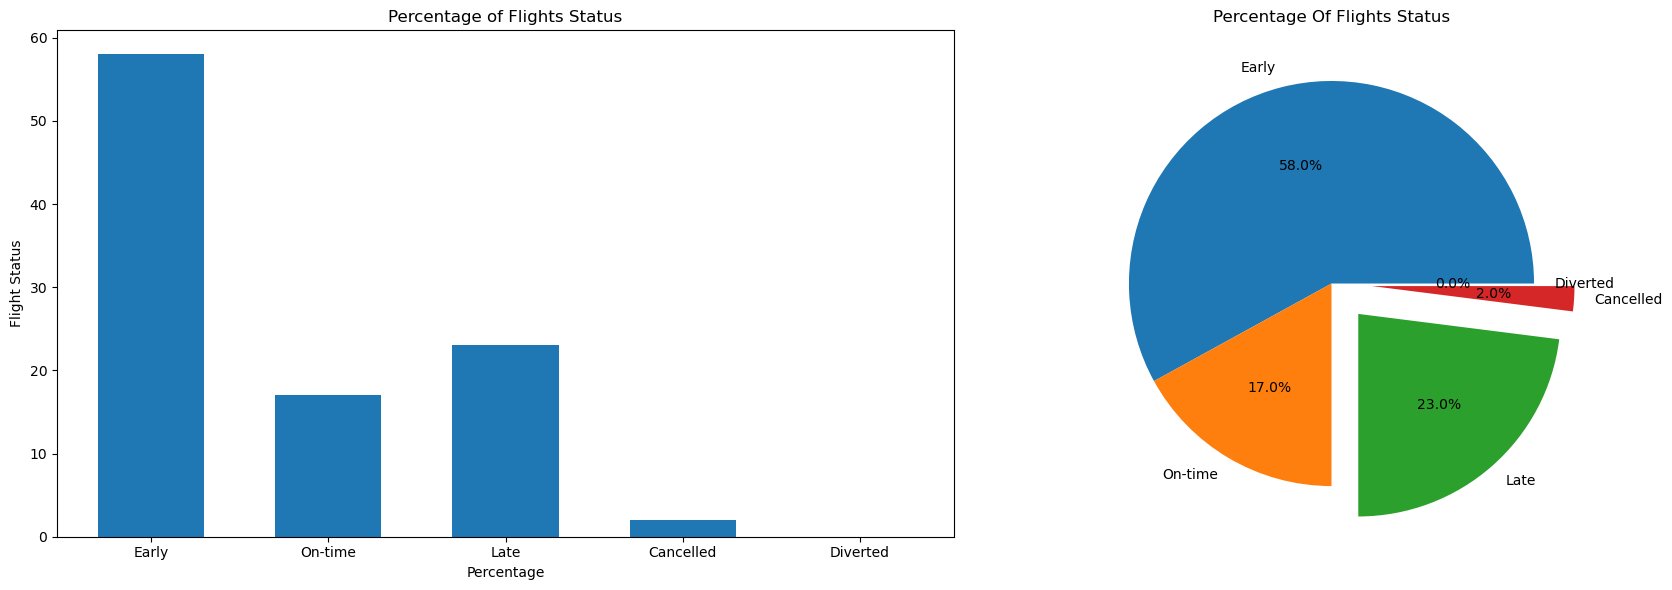

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

X = ['Early', 'On-time', 'Late', 'Cancelled', 'Diverted']
Y = [flights_early, flights_ontime, flights_late, flights_cancelled, flights_diverted]

# Bar plot on the first subplot (ax1)
ax1.bar(X, Y, width = 0.6)
ax1.set_xlabel("Percentage")
ax1.set_ylabel("Flight Status")
ax1.set_title("Percentage of Flights Status")

# Pie chart on the second subplot (ax2)
ax2.pie(Y, labels=X, explode=[0, 0, 0.2, 0.2, 0], autopct='%1.1f%%')
ax2.set_title("Percentage Of Flights Status")

plt.tight_layout()
plt.show()

Above charts provide a clear breakdown of flight statuses:

- The majority of flights (about75%) are either on-time or early.
- Approximately 15-20% of flights are delayed.
- A small percentage (less than 5%) of flights are cancelled or diverted.

This distribution suggests that while delays are not uncommon, the vast majority of flights operate as scheduled or better. The low percentage of cancellations and diversions indicates that these are relatively rare events.

In [42]:
df_cancelled = df_cancelled.loc[df_cancelled['FlightDate'] != "FlightDate"]

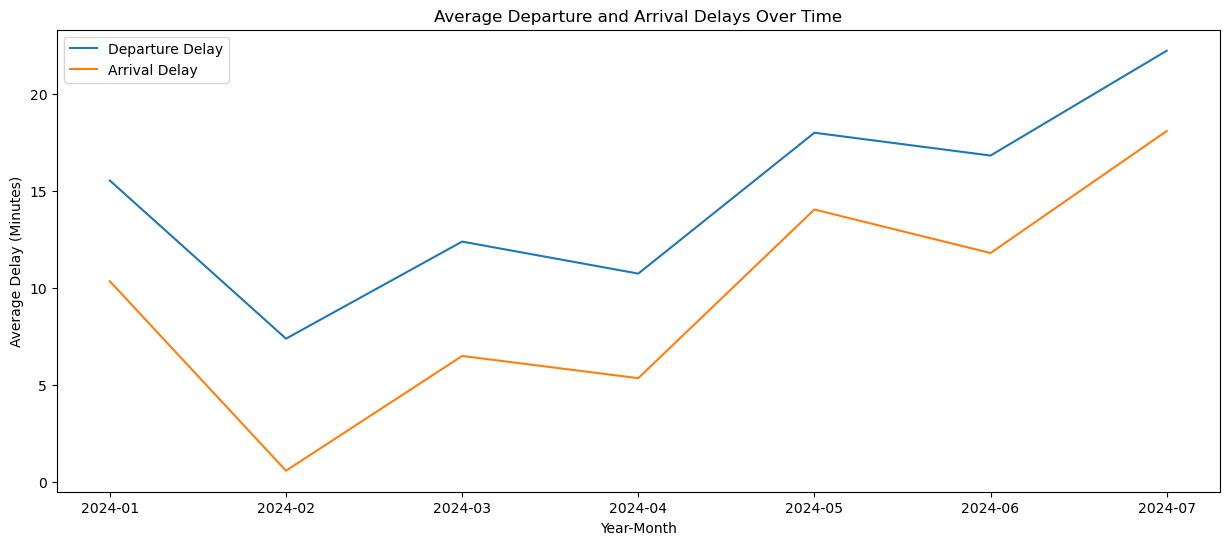

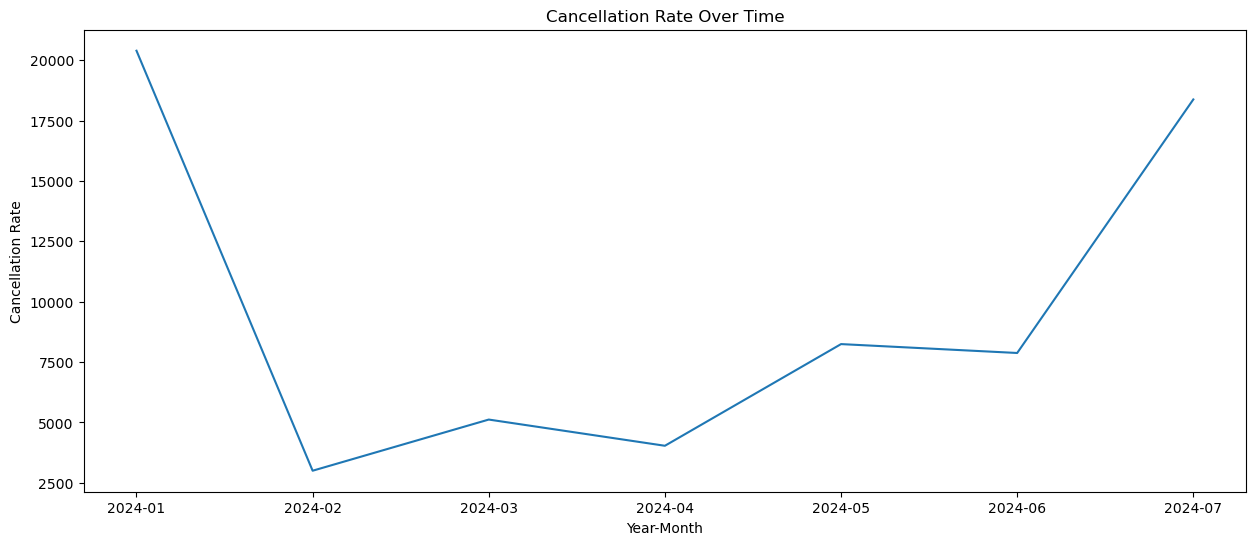

In [43]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%Y-%m-%d')
# Create a new column to represent the year-month
df['YearMonth'] = df['FlightDate'].dt.to_period('M')
# Calculate the average departure and arrival delays per year-month
monthly_delays = df.groupby('YearMonth')[['DepDelay', 'ArrDelay']].mean().reset_index()
monthly_delays['YearMonth'] = monthly_delays['YearMonth'].astype(str)  # Convert YearMonth to string
# Plot the average departure and arrival delays per year-month
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_delays, x='YearMonth', y='DepDelay', label='Departure Delay')
sns.lineplot(data=monthly_delays, x='YearMonth', y='ArrDelay', label='Arrival Delay')
plt.title('Average Departure and Arrival Delays Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Delay (Minutes)')
plt.legend()
plt.show()


# Convert FlightDate to datetime format
df_cancelled['FlightDate'] = pd.to_datetime(df_cancelled['FlightDate'], format='%Y-%m-%d')
# Create a new column to represent the year-month
df_cancelled['YearMonth'] = df_cancelled['FlightDate'].dt.to_period('M')
# Calculate the monthly cancellation rate
monthly_cancellations = df_cancelled.groupby('YearMonth')['Cancelled'].count().reset_index()
monthly_cancellations['YearMonth'] = monthly_cancellations['YearMonth'].astype(str)  # Convert YearMonth to string
# Plot the monthly cancellation rate
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_cancellations, x='YearMonth', y='Cancelled')
plt.title('Cancellation Rate Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Cancellation Rate')
plt.show()

**Average Departure and Arrival Delays Over Time:**

- Both departure and arrival delays follow similar patterns, with arrival delays generally being slightly higher.
- The highest delays are observed in January, June, and July, likely due to winter weather and peak summer travel demand.

**Cancellation Rate Over Time:**

- The highest cancellation rates occur in January and July, correlating with the months of highest delays.
- Generally lower cancellation rates are seen in spring and early summer months.

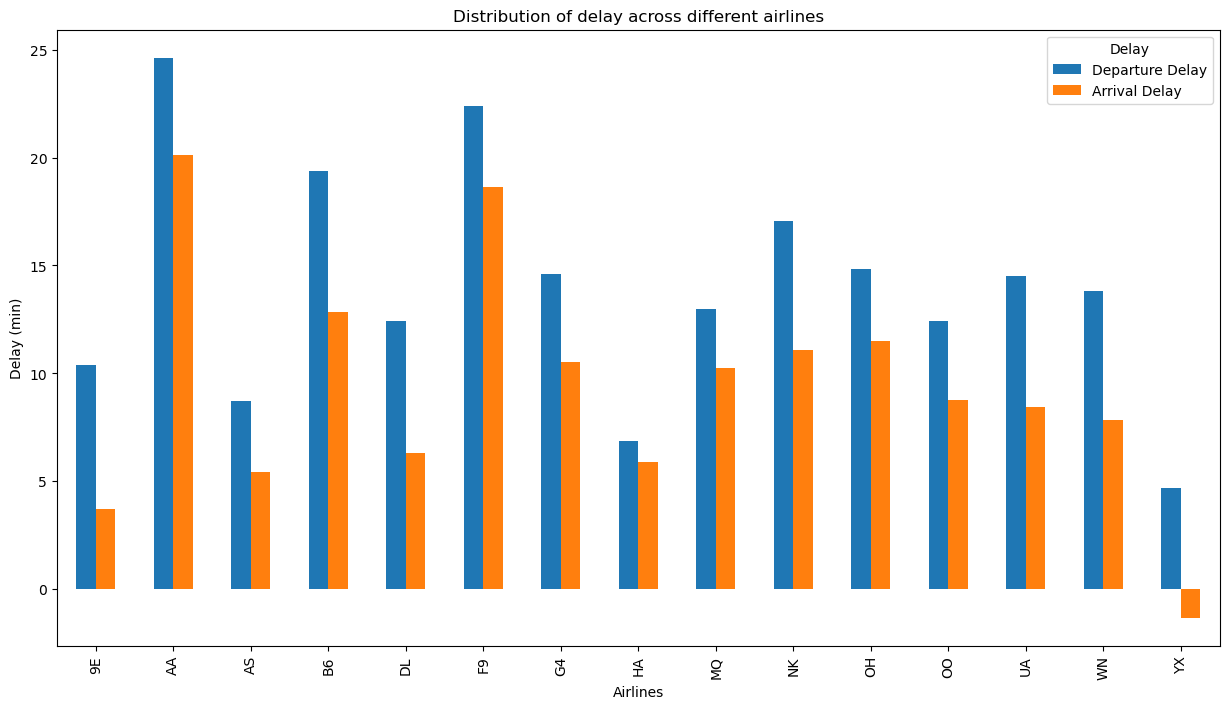

In [44]:
df['Reporting_Airline'] = df['Reporting_Airline'].apply(lambda x: x[:2])
df.groupby('Reporting_Airline')[['DepDelay','ArrDelay']].mean().plot.bar(figsize=[15, 8])

plt.title("Distribution of delay across different airlines")
plt.ylabel('Delay (min)')
plt.xlabel('Airlines')

plt.legend(['Departure Delay', 'Arrival Delay'], title="Delay")
plt.show()

- Most airlines have similar patterns of departure and arrival delays, with departure delays consistently higher than arrival delays.
- Southwest Airlines (WN), despite having the highest number of flights, shows relatively moderate delay times.

**Departure and arrival delays between origin and destination airports:**

We are finding the whether there are any airports that experience consistently higher delays using data of the following columns.

1. Origin
2. Dest
3. DepDelay
4. ArrDelay

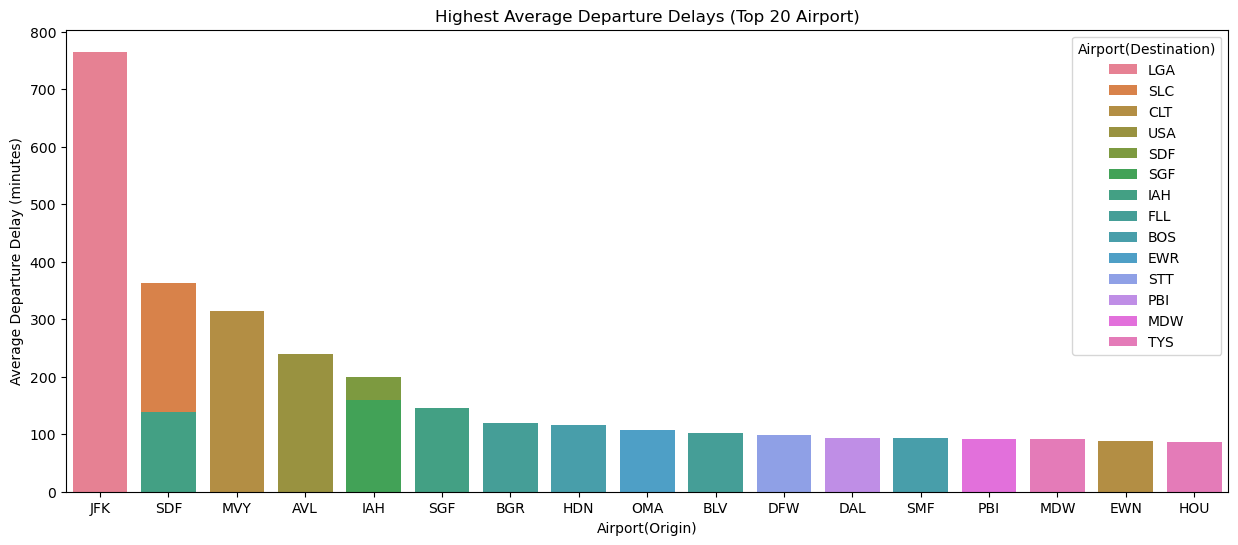

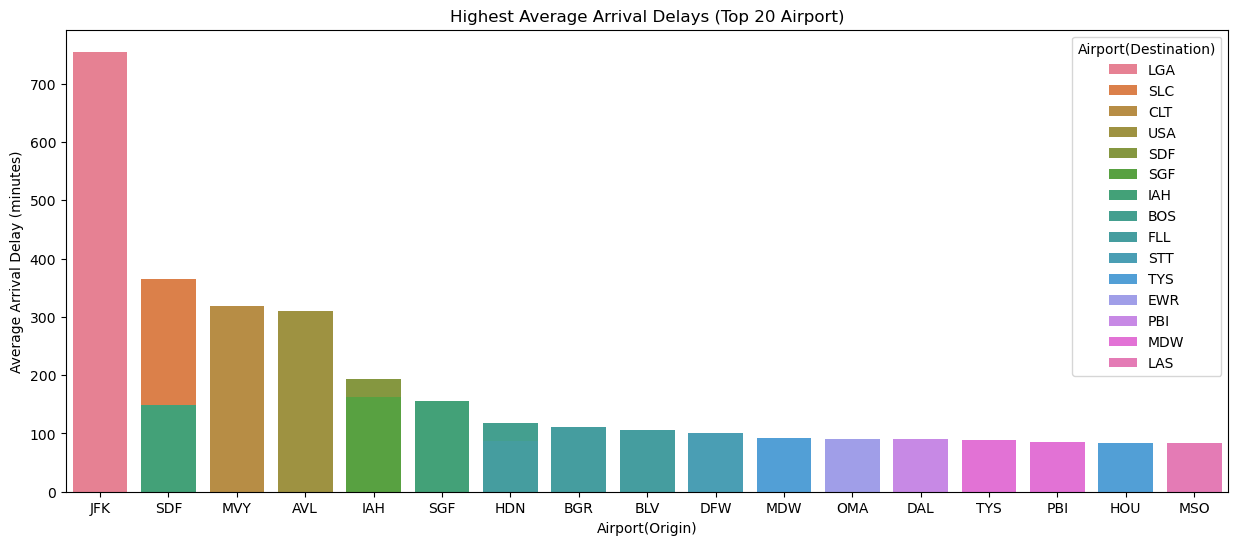

In [45]:
airport_delays = df.groupby(['Origin', 'Dest'])[['DepDelay', 'ArrDelay']].mean().reset_index()
dep_delays = airport_delays.sort_values('DepDelay', ascending = False).head(20)
plt.figure(figsize=(15, 6))
sns.barplot(data = dep_delays, x = 'Origin', y = 'DepDelay', hue = 'Dest', dodge = False)
plt.title('Highest Average Departure Delays (Top 20 Airport)')
plt.ylabel('Average Departure Delay (minutes)')
plt.xlabel('Airport(Origin)')
plt.legend(title='Airport(Destination)')
plt.show()

# Visualize the highest average arrival delays for top 20 airport pairs
arr_delays = airport_delays.sort_values('ArrDelay', ascending = False).head(20)
plt.figure(figsize=(15, 6))
sns.barplot(data=arr_delays, x='Origin', y='ArrDelay', hue='Dest', dodge = False)
plt.title('Highest Average Arrival Delays (Top 20 Airport)')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xlabel('Airport(Origin)')
plt.legend(title='Airport(Destination)')
plt.show()

John F. Kennedy International Airport (JFK) in New York stands out prominently in both departure and arrival delay charts, consistently showing the highest average delays.

**Patterns in the causes of delays**

We are finding the patterns in the causes of delays (e.g., Carrier, Weather, National Air System, Security, or Late aircraft) that contribute the most to overall flight delays using data of following columns:

1. CarrierDelay
2. WeatherDelay
3. NASDelay
4. SecurityDelay
5. LateAircraftDelay

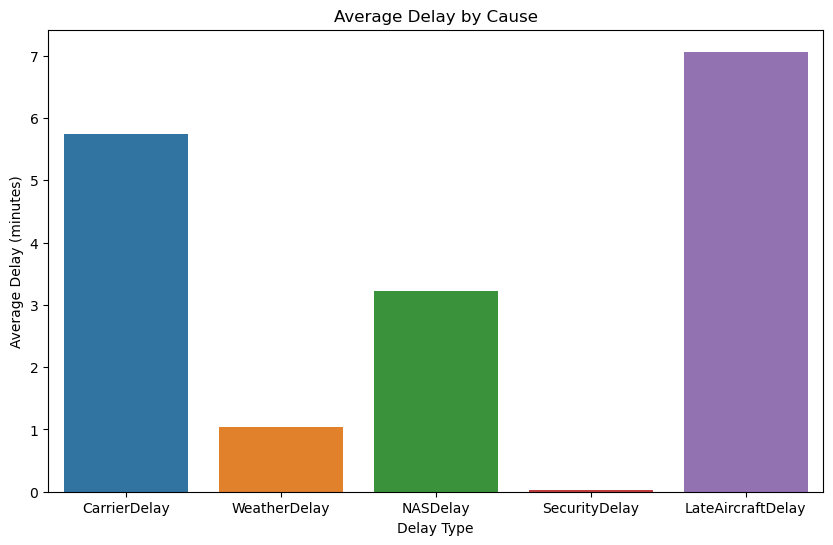

In [46]:
delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_averages = df[delay_types].mean().reset_index()

delay_averages.columns = ['DelayType', 'AverageDelay']

plt.figure(figsize = (10, 6))
sns.barplot(data = delay_averages, x = 'DelayType', y = 'AverageDelay', palette = 'tab10')
plt.title('Average Delay by Cause')
plt.xlabel('Delay Type')
plt.ylabel('Average Delay (minutes)')
plt.show()

*We found that Late Aircraft delay and Carrier Delay has the highest delay average. This means that airlines needs to adpat to resolve or bring down this average delay that is being caused.*

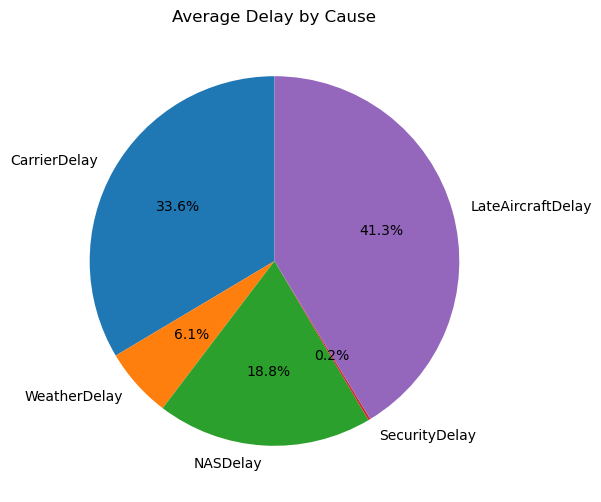

In [47]:
delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_averages = df[delay_types].mean()

# Plot the pie chart
plt.figure(figsize=(10, 6))
delay_averages.plot(kind='pie', autopct='%.1f%%', startangle = 90)
plt.title('Average Delay by Cause')
plt.show()

*Late Aircraft Delay accounts for 41.3% where as Carrier delay accounts for 33.6%. The total is approximately 75% of the reasons that cause an aircraft to get delayed (Arrival as well as Departures).*

**Flight delays and cancellations by day of the week, month, or time of day**

We are finding flight delays and cancellations that vary by day of the week, month, or time of day and any peak hours or days where delay is more likely to occur using data of following fields

1. DayOfWeek
2. Month
3. DepTimeBlk
4. ArrTimeBlk
5. DepDelay
6. ArrDelay
7. Cancelled

1: Monday, 2: Tuesday, 3: Wednesday, 4: Thursday, 5: Friday, 6: Saturday, 7: Sunday

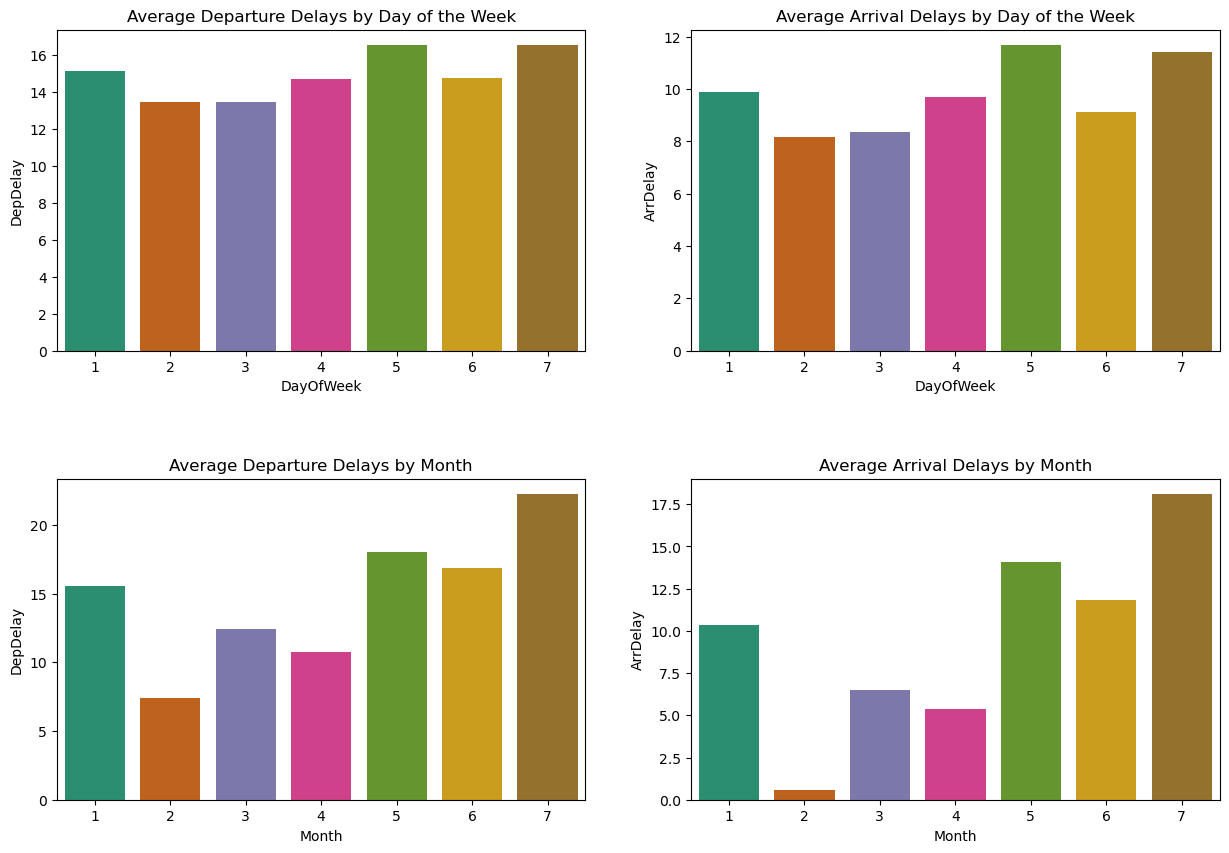

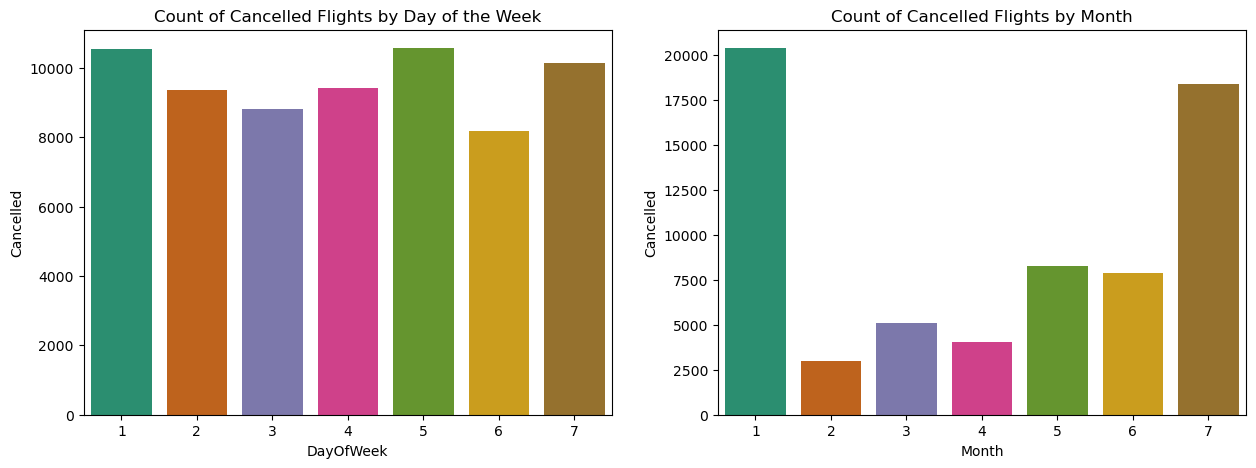

In [48]:
avg_delays_by_day = df.groupby('DayOfWeek')[['DepDelay', 'ArrDelay']].mean().reset_index()
avg_delays_by_month = df.groupby('Month')[['DepDelay', 'ArrDelay']].mean().reset_index()
cancelled_by_day_count = df_cancelled.groupby('DayOfWeek')['Cancelled'].count().reset_index()
cancelled_by_month_count = df_cancelled.groupby('Month')['Cancelled'].count().reset_index()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x='DayOfWeek', y='DepDelay', data=avg_delays_by_day, ax=axs[0, 0], palette='Dark2')
axs[0, 0].set_title('Average Departure Delays by Day of the Week')
sns.barplot(x='DayOfWeek', y='ArrDelay', data=avg_delays_by_day, ax=axs[0, 1], palette='Dark2')
axs[0, 1].set_title('Average Arrival Delays by Day of the Week')

sns.barplot(x='Month', y='DepDelay', data=avg_delays_by_month, ax=axs[1, 0], palette='Dark2')
axs[1, 0].set_title('Average Departure Delays by Month')
sns.barplot(x='Month', y='ArrDelay', data=avg_delays_by_month, ax=axs[1, 1], palette='Dark2')
axs[1, 1].set_title('Average Arrival Delays by Month')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='DayOfWeek', y='Cancelled', data=cancelled_by_day_count, ax=axs[0], palette='Dark2')
axs[0].set_title('Count of Cancelled Flights by Day of the Week')
sns.barplot(x='Month', y='Cancelled', data=cancelled_by_month_count, ax=axs[1], palette='Dark2')
axs[1].set_title('Count of Cancelled Flights by Month')

plt.show()

Delays by Week: Friday and Sunday have the highest average delays, while Tuesday and Wednesday experience the lowest.

Delays by Month: July sees the most delays, while February has the fewest, reflecting seasonal travel peaks.

Cancellation by Week: Friday and Sunday show the highest cancellations, with mid-week days like Tuesday having fewer.

Cancellation by Month: January leads in cancellations, followed by July, likely due to weather and peak travel.

Conclusion: July and January are the busiest months for delays and cancellations, especially on Fridays and Sundays. Traveling mid-week and in off-peak months like February can help avoid disruptions

**Relationship between flight distance and delay duration**

We are finding the relationship between flight distance and delay duration to analyse out of longer and shorter distance, which flights are more likely to be delayed using data of following columns:

1. Distance
2. DepDelay
3. ArrDelay

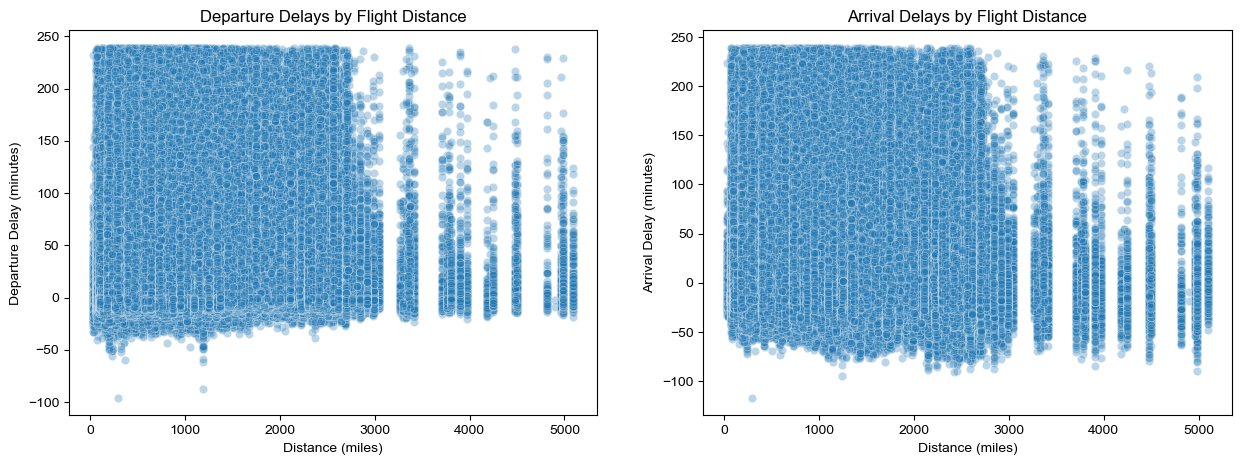

In [49]:
# Filter out extreme delays to make the plot more readable
filtered_df = df[(df['DepDelay'] < 240) & (df['ArrDelay'] < 240)]

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("whitegrid")

# Plot departure delays by flight distance
sns.scatterplot(x='Distance', y='DepDelay', data=filtered_df, ax=axs[0], alpha=0.3)
axs[0].set_title('Departure Delays by Flight Distance')
axs[0].set_xlabel('Distance (miles)')
axs[0].set_ylabel('Departure Delay (minutes)')

# Plot arrival delays by flight distance
sns.scatterplot(x='Distance', y='ArrDelay', data=filtered_df, ax=axs[1], alpha=0.3)
axs[1].set_title('Arrival Delays by Flight Distance')
axs[1].set_xlabel('Distance (miles)')
axs[1].set_ylabel('Arrival Delay (minutes)')

plt.show()

*From above scatter plot we observe that Shorter distance flights are having more delays as compared to long haul flights*

**Impact of diverted flights on overall delays and cancellations**

We are finding the impact of diverted flights on overall delays and cancellationsand whether certain airlines or airports more prone to diversions than others using data of following columns.

1. Reporting_Airline
2. Origin
3. Dest
4. Diverted.

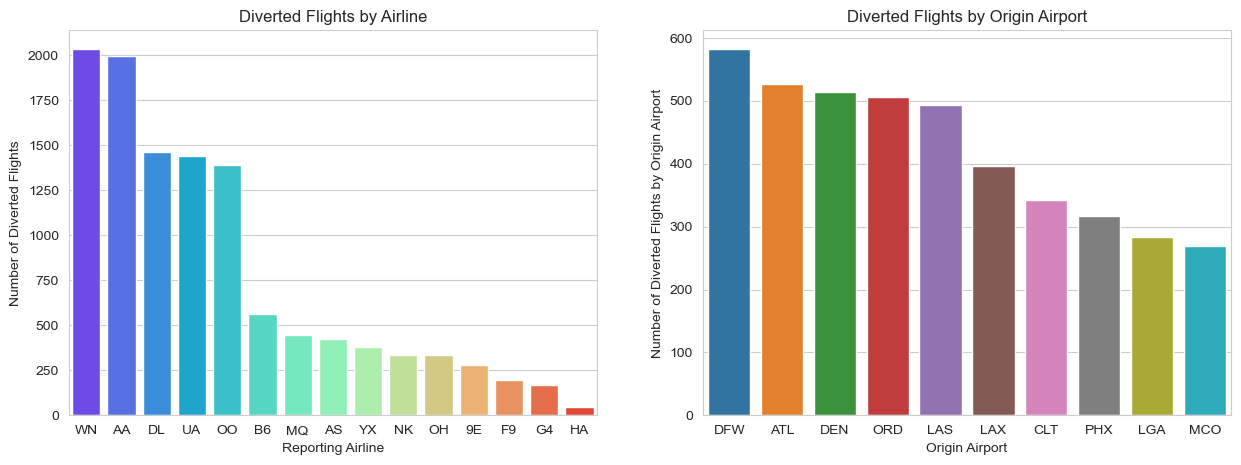

In [50]:
airline_diverted = df_diverted[df_diverted['Diverted'] == 1]['Reporting_Airline'].value_counts()
origin_diverted = df_diverted[df_diverted['Diverted'] == 1]['Origin'].value_counts().head(10)

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("whitegrid")

# Plot diverted flights by airline
sns.barplot(x=airline_diverted.index, y=airline_diverted.values, ax=axs[0], palette='rainbow')
axs[0].set_title('Diverted Flights by Airline')
axs[0].set_xlabel('Reporting Airline')
axs[0].set_ylabel('Number of Diverted Flights')

# Plot diverted flights by origin airport
sns.barplot(x=origin_diverted.index, y=origin_diverted.values, ax=axs[1], palette='tab10')
axs[1].set_title('Diverted Flights by Origin Airport')
axs[1].set_xlabel('Origin Airport')
axs[1].set_ylabel('Number of Diverted Flights by Origin Airport')

plt.show()

Diverted Flights by Airline: **WN** (Southwest Airlines) has the highest number of diverted flights, followed by **AA** (American Airlines) and **DL** (Delta Airlines). Smaller airlines like **HA** and **G4** show the least diversions.

Diverted Flights by Origin Airport: **DFW** (Dallas/Fort Worth) leads in flight diversions, followed closely by **ATL** (Atlanta) and **DEN** (Denver). Airports like **MCO** (Orlando) and **LGA** (LaGuardia) have fewer diversions.

**Proportion of on-time flights across different airlines, airports, and time periods**

We are finding the proportion of on-time flights compare across different airlines, airports, and time periods using data of following columns.

1. Reporting_Airline
2. Origin
3. Dest
4. Year
4. Month
5. DayOfWeek
6. DepDelay
7. ArrDelay

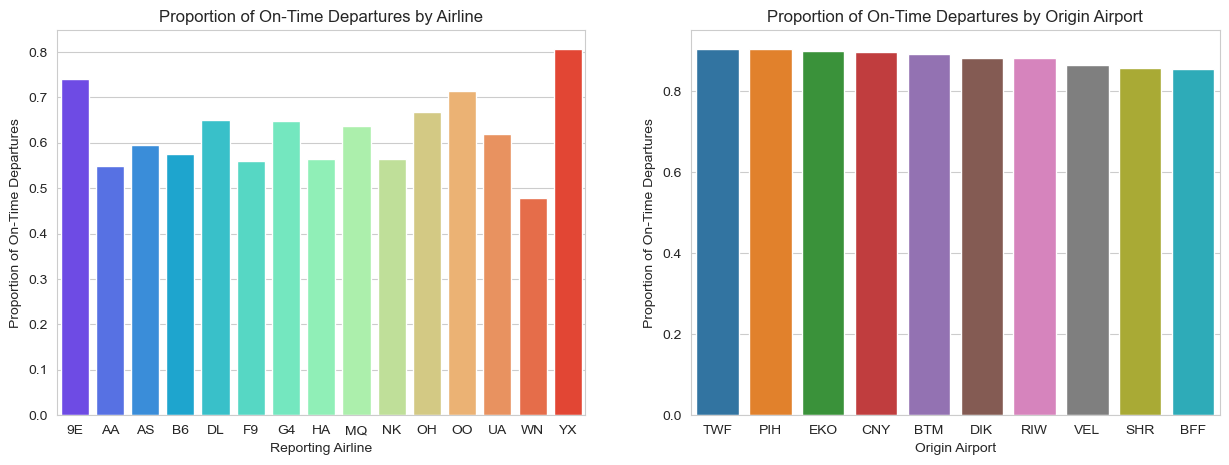

In [51]:
def is_on_time(delay):
    return 1 if delay <= 0 else 0

# Calculate on-time flights
df['OnTime_Dep'] = df['DepDelay'].apply(is_on_time)
df['OnTime_Arr'] = df['ArrDelay'].apply(is_on_time)

# Calculate the proportion of on-time flights by airline and origin airport
airline_ontime = df.groupby('Reporting_Airline')['OnTime_Dep'].mean()
origin_ontime = df.groupby('Origin')['OnTime_Dep'].mean().sort_values(ascending=False).head(10)

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("whitegrid")

# Plot on-time flights by airline
sns.barplot(x=airline_ontime.index, y=airline_ontime.values, ax=axs[0], palette='rainbow')
axs[0].set_title('Proportion of On-Time Departures by Airline')
axs[0].set_xlabel('Reporting Airline')
axs[0].set_ylabel('Proportion of On-Time Departures')

# Plot on-time flights by origin airport
sns.barplot(x=origin_ontime.index, y=origin_ontime.values, ax=axs[1], palette='tab10')
axs[1].set_title('Proportion of On-Time Departures by Origin Airport')
axs[1].set_xlabel('Origin Airport')
axs[1].set_ylabel('Proportion of On-Time Departures')

plt.show()

Proportion of On-Time Departures by Airline: YX leads with the highest proportion of on-time departures, followed by 9E and OO. WN (Southwest) has the lowest proportion, indicating more frequent delays.

Proportion of On-Time Departures by Origin Airport are almost same for all airports.

**Factors with the most significant impact on flight delays**

We are finding the factors (e.g., airline, origin and destination airports, time-related factors, or flight characteristics) that have the most significant impact on flight delays and whether these factors be used to predict flight delays or cancellations using data of following columns:

1. Reporting_Airline
2. Origin
3. Dest
4. DayOfWeek
5. Month
6. DepTimeBlk
7. ArrTimeBlk
8. Distance
9. DepDelay
10. ArrDelay
11. CarrierDelay
12. WeatherDelay
13. NASDelay
14. SecurityDelay
15. LateAircraftDelay

In [52]:
# Convert 'DepTime' and 'ArrTime' to numerical format
def time_to_minutes(time_val):
    if pd.isna(time_val):
        return np.nan
    if isinstance(time_val, str):
        try:
            time_obj = datetime.strptime(time_val, '%I:%M %p')
            return time_obj.hour * 60 + time_obj.minute
        except ValueError:
            return np.nan
    elif isinstance(time_val, (int, float)):
        # Assuming the time is in HHMM format
        hours = int(time_val) // 100
        minutes = int(time_val) % 100
        return hours * 60 + minutes
    else:
        return np.nan

df['DepTime_minutes'] = df['DepTime'].apply(time_to_minutes)
df['ArrTime_minutes'] = df['ArrTime'].apply(time_to_minutes)

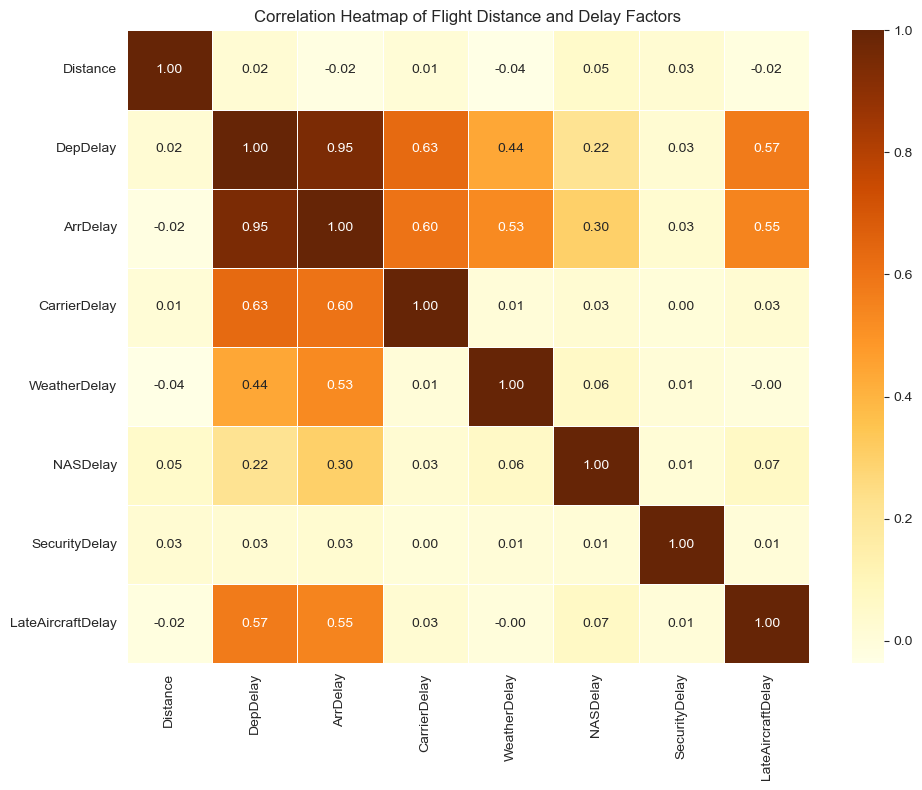

In [53]:
# Calculate the average delay values by airline, origin, destination, and distance
avg_delays = df.groupby(['Reporting_Airline', 'Origin', 'Dest', 'Distance']).agg({
    'DepDelay': 'mean',
    'ArrDelay': 'mean',
    'CarrierDelay': 'mean',
    'WeatherDelay': 'mean',
    'NASDelay': 'mean',
    'SecurityDelay': 'mean',
    'LateAircraftDelay': 'mean'
}).reset_index()

# Calculate the correlation matrix for distance and delay factors only
corr_matrix = avg_delays[['Distance', 'DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlOrBr", linewidths=0.6, fmt='.2f')
plt.title("Correlation Heatmap of Flight Distance and Delay Factors")
plt.tight_layout()
plt.show()

The heatmap reveals that departure delays (DepDelay) and arrival delays (ArrDelay) are strongly correlated (0.95), indicating that departure delays are highly predictive of arrival delays.

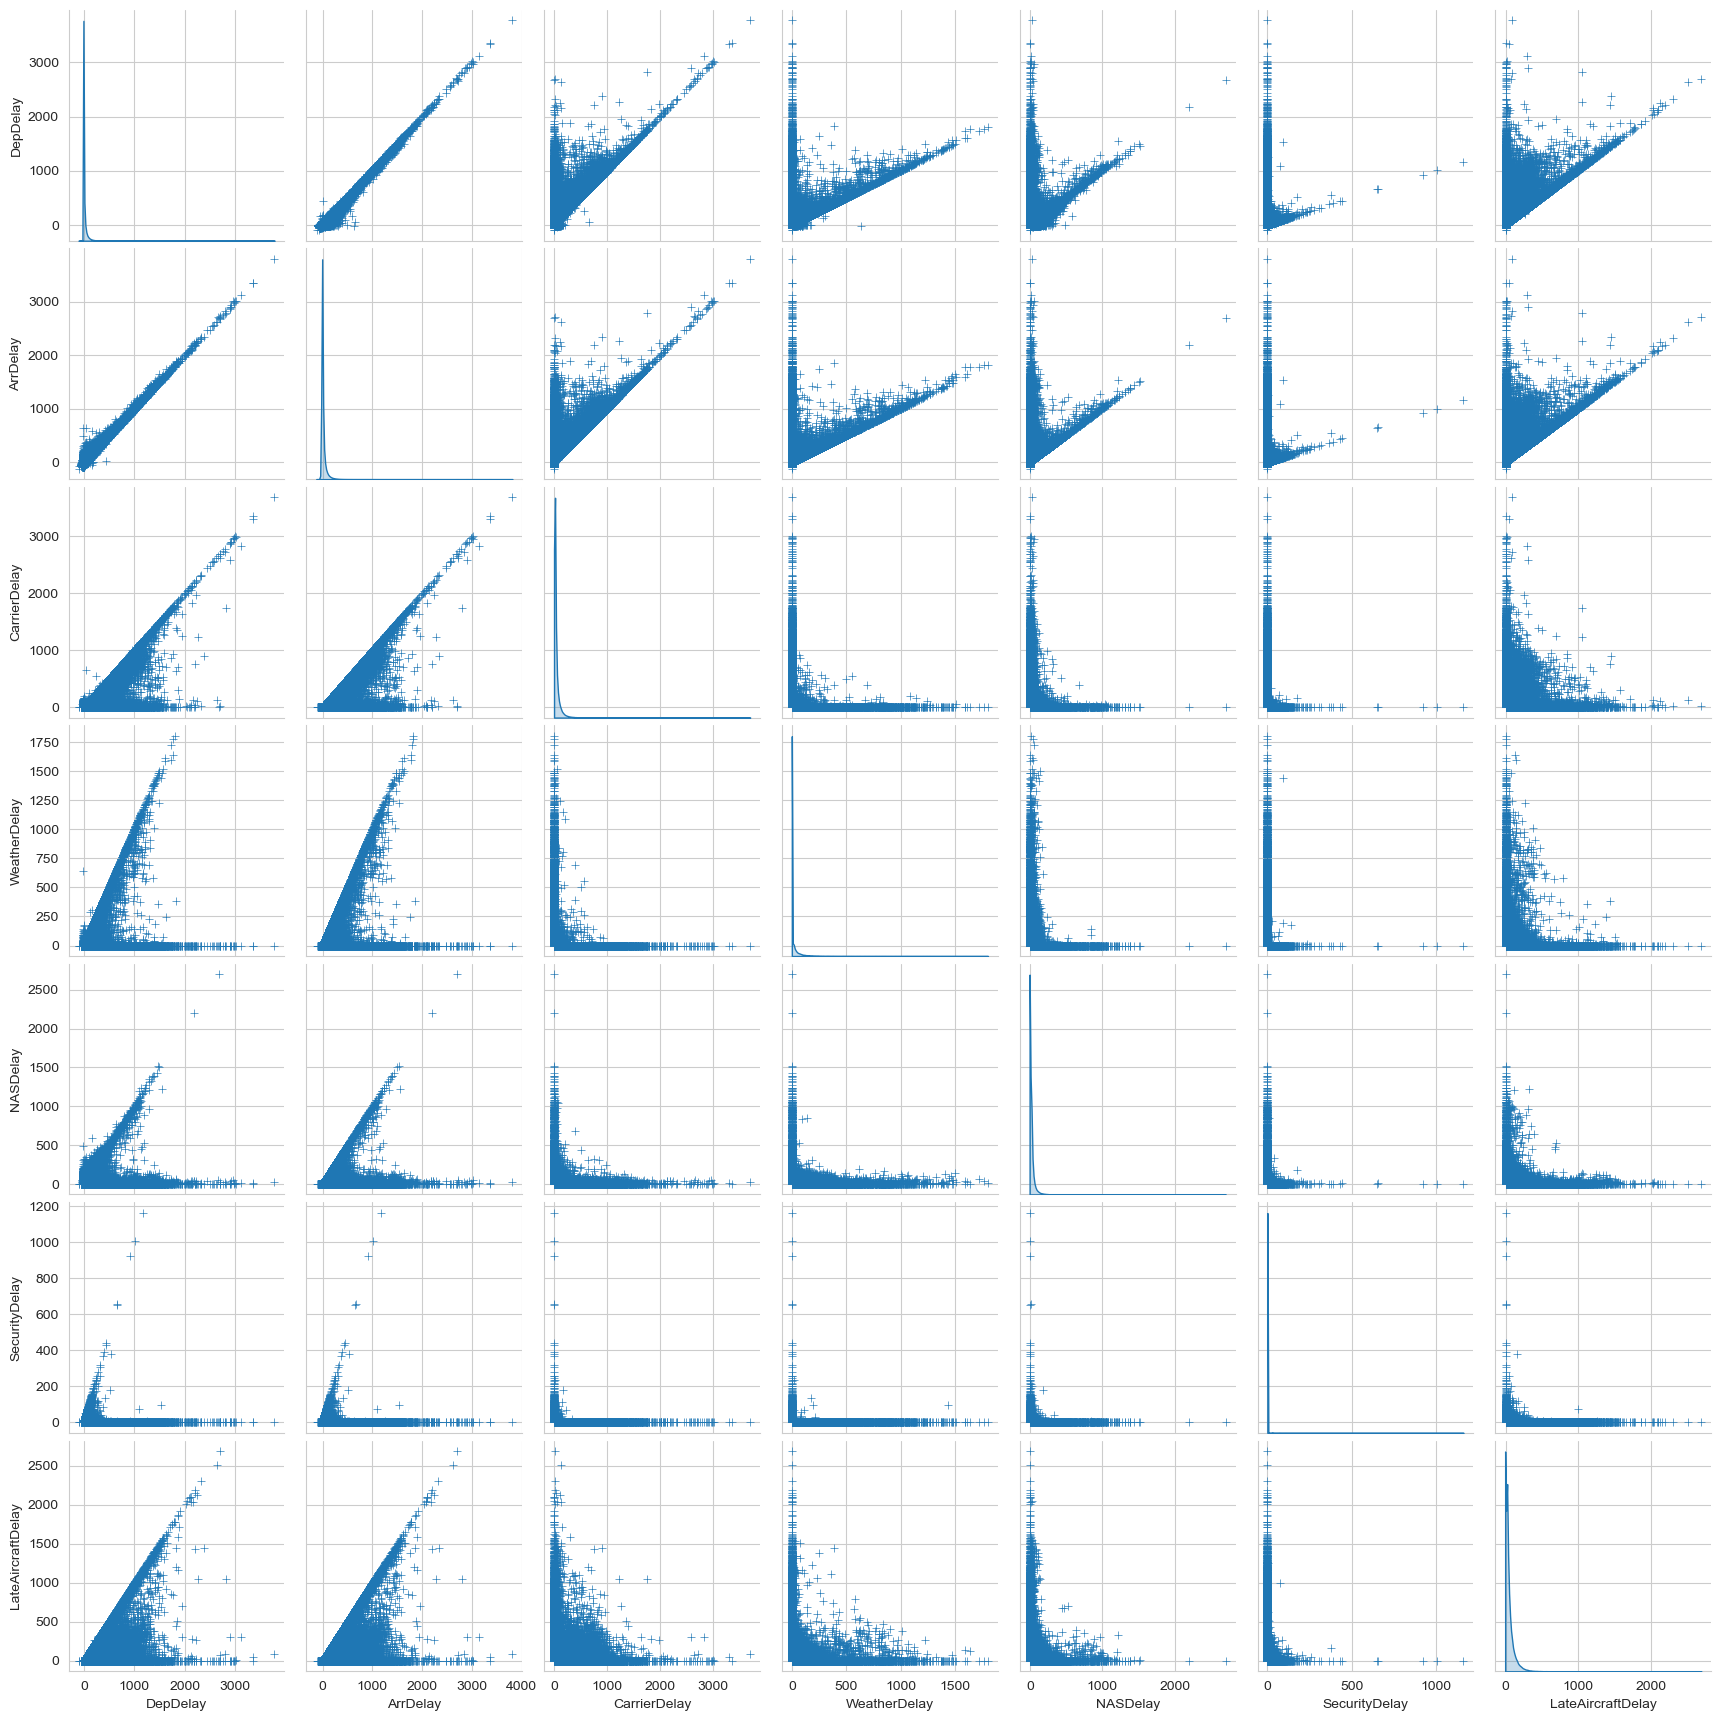

In [54]:
avg_delays = df.groupby(['Reporting_Airline', 'Origin', 'Dest', 'DayOfWeek', 'Month', 'DepTime', 'ArrTime', 'Distance']).agg({
    'DepDelay': 'mean',
    'ArrDelay': 'mean',
    'CarrierDelay': 'mean',
    'WeatherDelay': 'mean',
    'NASDelay': 'mean',
    'SecurityDelay': 'mean',
    'LateAircraftDelay': 'mean'
}).reset_index()

# Create a pair plot to visualize the relationships between different features and delays
selected_columns = ['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
sns.pairplot(avg_delays[selected_columns], diag_kind='kde', markers='+')
plt.show()

**Most common reasons for flight cancellations**

We are finding the most common reasons for flight cancellations and whether these reasons vary based on airline, airport, or time period using data of following columns:

1. Cancelled
2. CancellationCode
3. Reporting_Airline
4. Origin
5. Dest
6. Year
7. Month
8. DayOfWeek

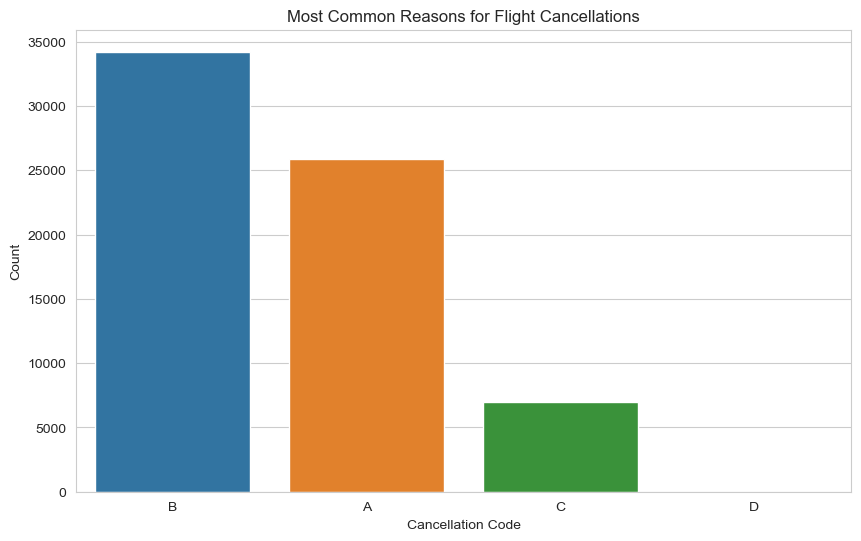

In [55]:
cancelled_flights = df_cancelled[df_cancelled['Cancelled'] == 1]
# Count the occurrences of each cancellation code
cancellation_counts = cancelled_flights['CancellationCode'].value_counts()
# Bar plot for cancellation reasons
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette='tab10')
plt.title('Most Common Reasons for Flight Cancellations')
plt.xlabel('Cancellation Code')
plt.ylabel('Count')
plt.show()

The bar chart reveals that carrier-related issues (code B) are the most frequent cause of flight cancellations, followed by weather-related cancellations (code A). National Aviation System (NAS) issues (code C) are the third most common reason, while security-related cancellations (code D) are relatively rare. This suggests that internal airline operations and weather conditions are the primary factors affecting flight cancellations.

**Relationship between taxi-in, taxi-out times, and overall flight delays**

We are finding the relationship between taxi-in, taxi-out times, and overall flight delays and whether longer
taxi times associated with increased delays using data of following columns:

1. TaxiIn
2. TaxiOut
3. DepDelay
4. ArrDelay

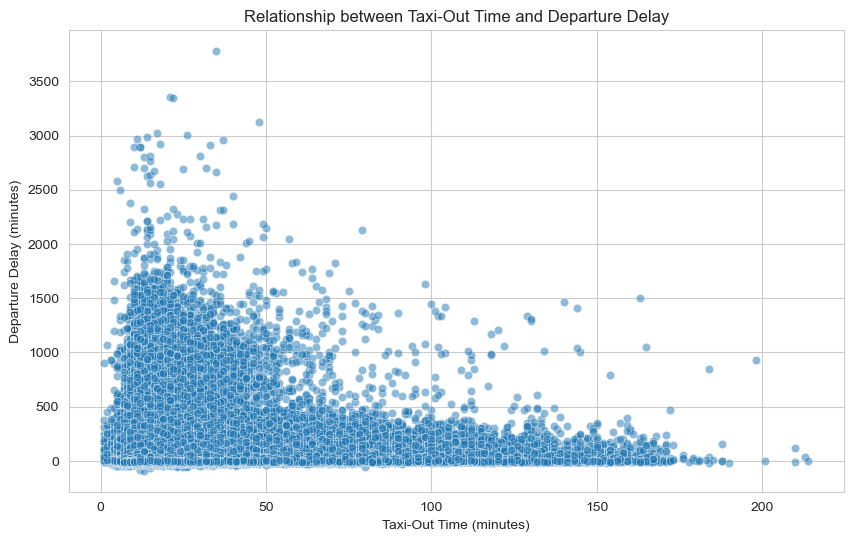

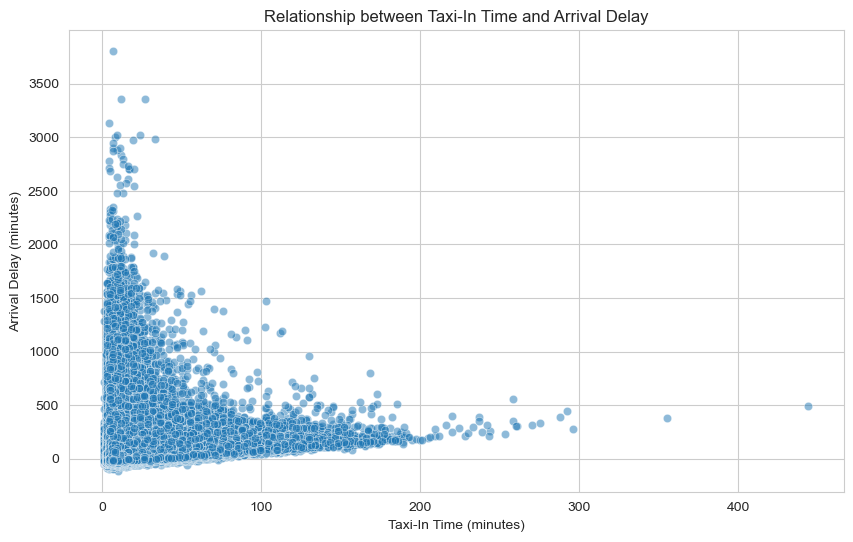

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TaxiOut', y='DepDelay', data=df, alpha=0.5)
plt.title('Relationship between Taxi-Out Time and Departure Delay')
plt.xlabel('Taxi-Out Time (minutes)')
plt.ylabel('Departure Delay (minutes)')
plt.show()

# Scatter plot for taxi-in time and arrival delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TaxiIn', y='ArrDelay', data=df, alpha=0.5)
plt.title('Relationship between Taxi-In Time and Arrival Delay')
plt.xlabel('Taxi-In Time (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

*From the above graphs we can see that airlines try to reduce the taxi-in and taxi-out times if the flights are significantly delayed to coverup the total elapsed flight time.*

### **Features selection for prediction**

In [57]:
colPred = ['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime', 'ArrDelay']

In [58]:
arrDelay_df = df[colPred]
get_df_info(arrDelay_df)

Dataframe Shape: (4017403, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,int64,int64,int64,int64,int64,object,object,int64,int64,int64,object,int64,int64
null values:,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Function written to remove leading 0 which will be used to convert Time fields (Object) into Float for prediction purpose.

In [59]:
def remove_zero(col):
    col_str = str(col)
    if col_str[0] == '0':
        return col_str[1:]
    else:
        return col_str

Conversion of CRSDepTime from Time (Object) to Float

In [60]:
arrDelay_df['hours'] = pd.to_datetime(arrDelay_df['CRSDepTime'].apply(lambda x: remove_zero(x))).dt.hour
arrDelay_df['minutes'] = pd.to_datetime(arrDelay_df['CRSDepTime'].apply(lambda x: remove_zero(x))).dt.minute/60
arrDelay_df['CRSDepTime'] = arrDelay_df['hours'] + arrDelay_df['minutes']

arrDelay_df = arrDelay_df.drop(columns=['hours', 'minutes'])
get_df_info(arrDelay_df)

Dataframe Shape: (4017403, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,int64,int64,int64,int64,int64,object,float64,int64,int64,int64,object,int64,int64
null values:,0,0,0,0,0,0,1,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.000025,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# Check for null values in CRSDepTime
null_count = arrDelay_df['CRSDepTime'].isnull().sum()
print(f"Number of null values in CRSDepTime: {null_count}")

# If there are null values, remove them
if null_count > 0:
    arrDelay_df = arrDelay_df.dropna(subset=['CRSDepTime'])
    print("Null values removed.")

# Verify that null values have been removed
null_count_after = arrDelay_df['CRSDepTime'].isnull().sum()
print(f"Number of null values in CRSDepTime after removal: {null_count_after}")

# Display updated info
get_df_info(arrDelay_df)

Number of null values in CRSDepTime: 1
Null values removed.
Number of null values in CRSDepTime after removal: 0
Dataframe Shape: (4017402, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,int64,int64,int64,int64,int64,object,float64,int64,int64,int64,object,int64,int64
null values:,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Conversion of DepTime from Time (Object) to Float

In [62]:
#The code creates 'hours' and 'minutes' columns by converting a time column to datetime and extracting the hour and minute components, and then adds these columns to the 'DepTime' column to create a new column with the time in hours and minutes.
arrDelay_df['hours'] = pd.to_datetime(arrDelay_df['DepTime'].apply(lambda x: remove_zero(x))).dt.hour
arrDelay_df['minutes'] = pd.to_datetime(arrDelay_df['DepTime'].apply(lambda x: remove_zero(x))).dt.minute/60
arrDelay_df['DepTime'] = arrDelay_df['hours'] + arrDelay_df['minutes']
# we will drop some columns "not in our model"
arrDelay_df = arrDelay_df.drop(columns=['hours', 'minutes'])
get_df_info(arrDelay_df)

Dataframe Shape: (4017402, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,int64,int64,int64,int64,int64,float64,float64,int64,int64,int64,object,int64,int64
null values:,0,0,0,0,0,464,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.01155,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Conversion of CRSArrTime from Time (Object) to Float

In [63]:
arrDelay_df['hours'] = pd.to_datetime(arrDelay_df['CRSArrTime'].apply(lambda x: remove_zero(x))).dt.hour
arrDelay_df['minutes'] = pd.to_datetime(arrDelay_df['CRSArrTime'].apply(lambda x: remove_zero(x))).dt.minute/60
arrDelay_df['CRSArrTime'] = arrDelay_df['hours'] + arrDelay_df['minutes']
# we will drop some columns "not in our model"
arrDelay_df = arrDelay_df.drop(columns=['hours', 'minutes'])
get_df_info(arrDelay_df)
     

Dataframe Shape: (4017402, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,int64,int64,int64,int64,int64,float64,float64,int64,int64,int64,float64,int64,int64
null values:,0,0,0,0,0,464,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.01155,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Conversion of Month, DayofMonth and DayofWeek from Object datatype to int for prediction purpose

In [64]:
#The code converts columns in a DataFrame from float to integer type and then calls a function 'get_df_info' to display information about the DataFrame.
arrDelay_df['Month'] = arrDelay_df['Month'].astype(float).astype(int)
arrDelay_df['DayofMonth'] = arrDelay_df['DayofMonth'].astype(float).astype(int)
arrDelay_df['DayOfWeek'] = arrDelay_df['DayOfWeek'].astype(float).astype(int)
get_df_info(arrDelay_df)

Dataframe Shape: (4017402, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,int64,int64,int64,int64,int64,float64,float64,int64,int64,int64,float64,int64,int64
null values:,0,0,0,0,0,464,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.01155,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Replacing blank cells with 0 for prediction

In [65]:
arrDelay_df.fillna(value=0, axis=0, inplace=True)
get_df_info(arrDelay_df)

Dataframe Shape: (4017402, 13)


,Month,DayofMonth,DayOfWeek,Distance,DistanceGroup,DepTime,CRSDepTime,DepDelay,DepartureDelayGroups,DepDelayMinutes,CRSArrTime,CRSElapsedTime,ArrDelay
column type,int64,int64,int64,int64,int64,float64,float64,int64,int64,int64,float64,int64,int64
null values:,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
arrDelay_df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup',
       'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups',
       'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime', 'ArrDelay'],
      dtype='object')

Correlation Matrix to identify, how different factors (features) imapct our target variable

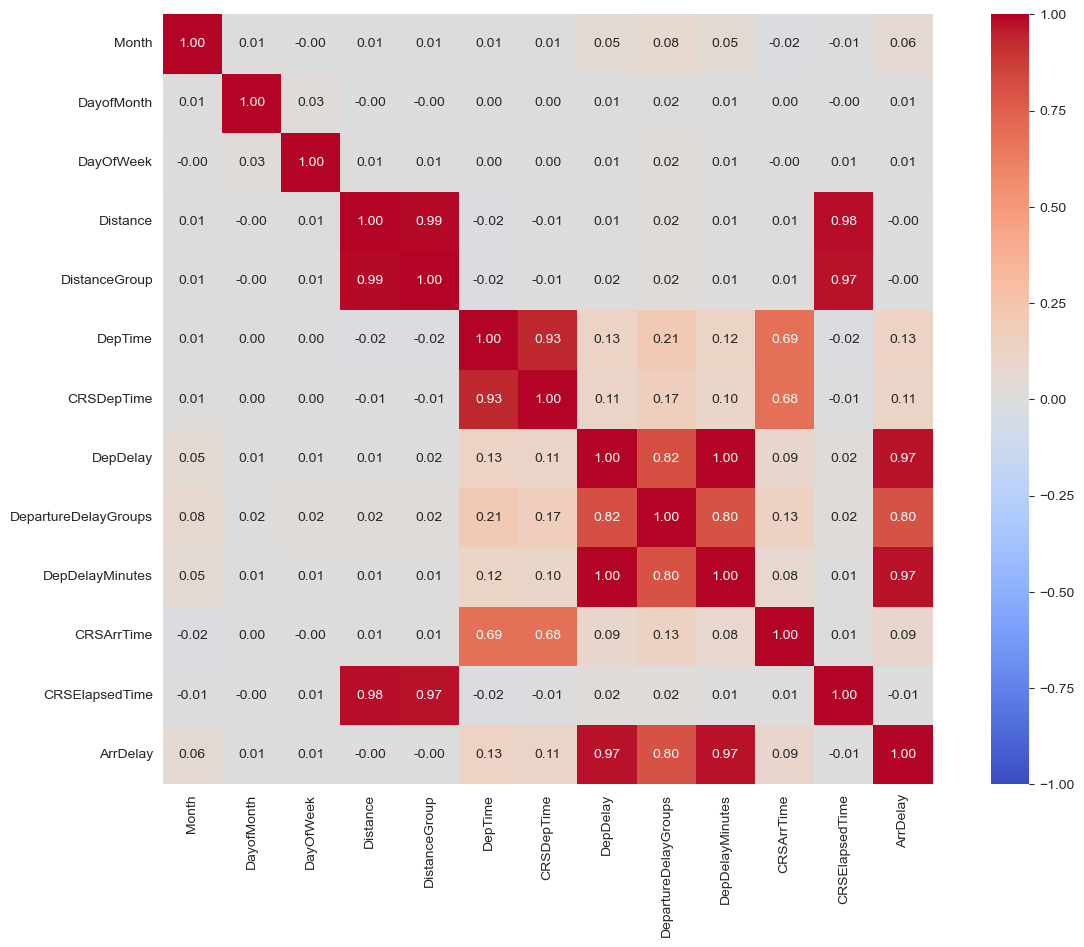

In [67]:
corrmat = arrDelay_df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmin=-1, square=True, annot=True, fmt='.2f', cmap='coolwarm', center=0);

We selected Arrival Delay as our target variable for several reasons:
- Arrival delay directly impacts passengers and airline operations, making it a key performance metric.
- It captures the cumulative effect of various factors throughout the flight journey, including departure delays and en-route issues.
- Predicting arrival delays can help airlines and airports better manage resources and passenger expectations.


In [68]:
y = np.array(arrDelay_df['ArrDelay'])

Features realted to Departure time, and schedule time along with features related to Month and Day were chosen for model training

In [69]:
X = np.array(arrDelay_df[['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime']])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Linear Regression Model**

Mean Squared Error:  [212.2520821573793, 196.67330879777322, 202.38070528245095, 195.21597681993967]
Root Mean Squared Error:  [14.568873743614477, 14.024026126536317, 14.226057264135097, 13.971971114339583]
Mean Absolute Error:  [9.984215327727929, 9.755984573756606, 9.963192672649788, 9.791640453508004]
R-squared:  [0.9485940783601458, 0.9522764392499075, 0.9464920283598607, 0.9513769857922549]
Mean of Mean Squared Error:  201.63051826438578
Mean of Root Mean Squared Error:  14.19773206215637
Mean of Mean Absolute Error:  9.873758256910582
Mean of R-squared:  0.9496848829405422


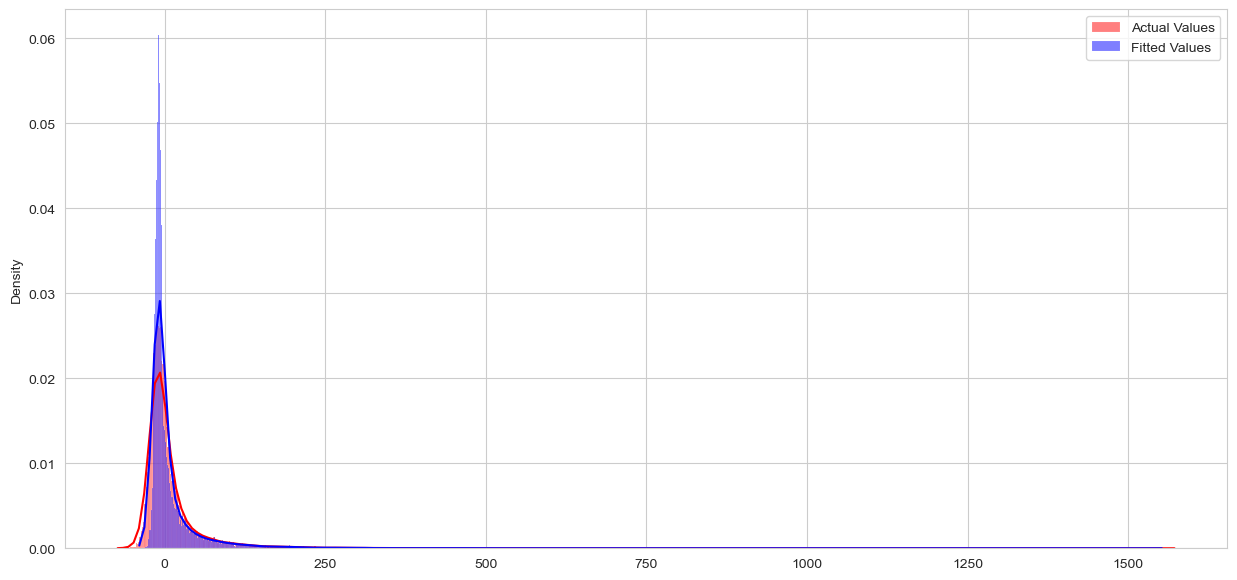

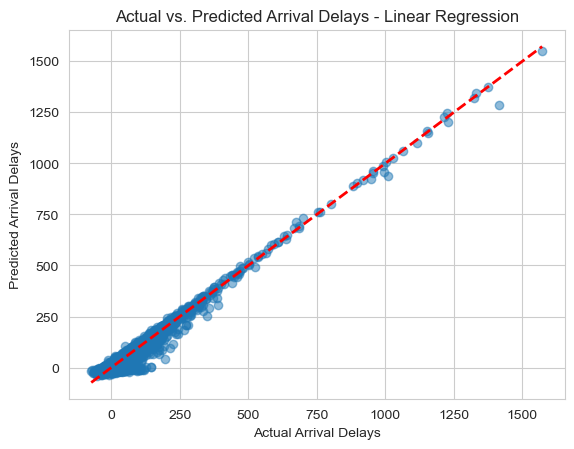

In [71]:
pred_mse = []
pred_rmse = []
pred_mae = []
pred_r2 = []
for i in range(1,5):
  sampled_df = arrDelay_df.sample(n=100000)
  X = np.array(sampled_df[['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime']])
  y = np.array(sampled_df['ArrDelay'])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # Create the linear regression model and fit it to the training data
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluating the model on the below 4 statistics
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  pred_mse.append(mse)
  pred_rmse.append(rmse)
  pred_mae.append(mae)
  pred_r2.append(r2)

print("Mean Squared Error: ", [float(x) for x in pred_mse])
print("Root Mean Squared Error: ", [float(x) for x in pred_rmse])
print("Mean Absolute Error: ", [float(x) for x in pred_mae])
print("R-squared: ", [float(x) for x in pred_r2])

print("Mean of Mean Squared Error: ", np.mean(pred_mse))
print("Mean of Root Mean Squared Error: ", np.mean(pred_rmse))
print("Mean of Mean Absolute Error: ", np.mean(pred_mae))
print("Mean of R-squared: ", np.mean(pred_r2))

plt.figure(figsize=(15,7))
ax1 = sns.histplot(y_test, kde=True, stat="density", color='r', label='Actual Values')
sns.histplot(y_pred, kde=True, stat="density", color='b', label='Fitted Values', ax=ax1)
plt.legend()
plt.show()

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Arrival Delays")
plt.ylabel("Predicted Arrival Delays")
plt.title("Actual vs. Predicted Arrival Delays - Linear Regression")

# This code plots a diagonal line on a scatter plot of the true values (y_test) against the predicted values (y_pred),
#which is a useful way to visualize how well the model's predictions match the true values
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)

plt.show()

### **Decision Tree Model**

Mean Squared Error:  [431.74925, 440.13595, 499.66215, 434.34315]
Root Mean Squared Error:  [20.77857670775359, 20.979417294100426, 22.353123942751267, 20.840900892235922]
Mean Absolute Error:  [14.55495, 14.61915, 14.73535, 14.69055]
R-squared:  [0.9018499304565338, 0.8869850840623889, 0.8802155421241115, 0.878761136717452]
Mean of Mean Squared Error:  451.47262499999994
Mean of Root Mean Squared Error:  21.2380047092103
Mean of Mean Absolute Error:  14.65
Mean of R-squared:  0.8869529233401215


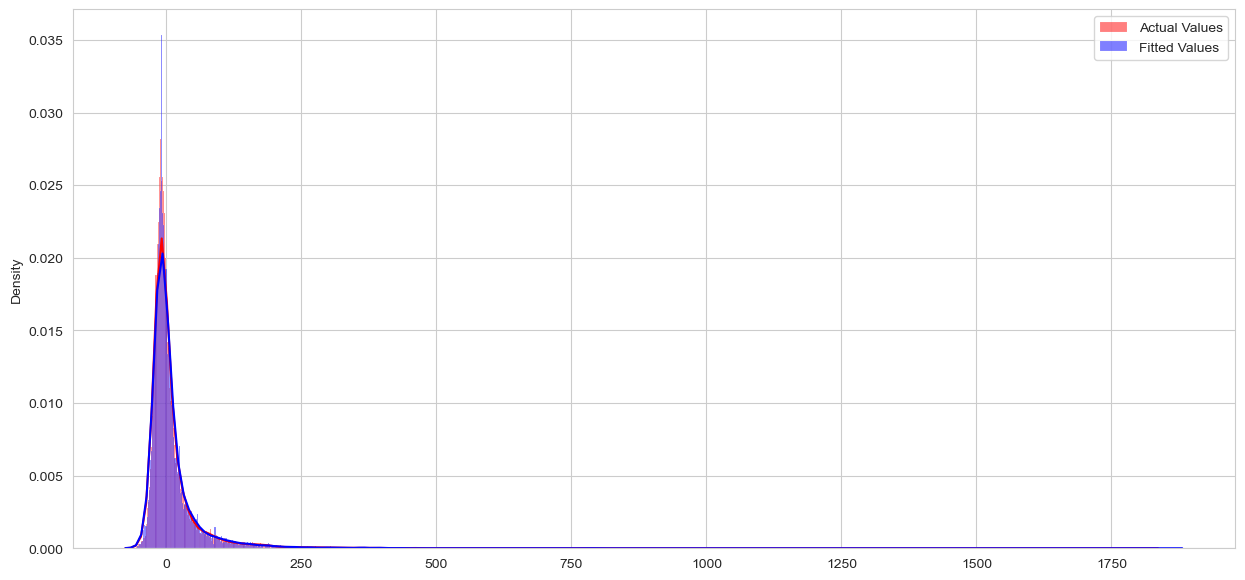

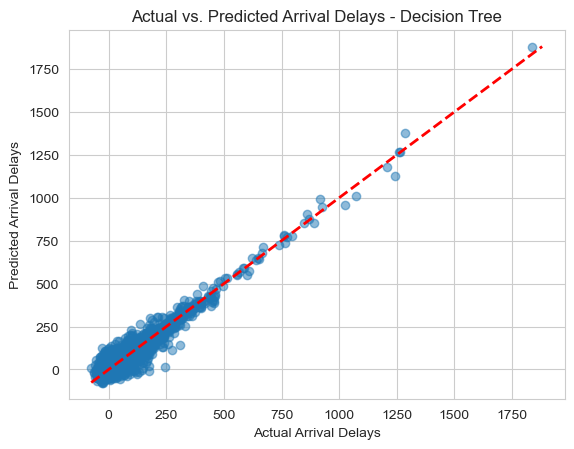

In [72]:
# Decision Tree
pred_mse = []
pred_rmse = []
pred_mae = []
pred_r2 = []

for i in range(1,5):
  sampled_df = arrDelay_df.sample(n=100000)
  X = np.array(sampled_df[['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime']])
  y = np.array(sampled_df['ArrDelay'])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create the linear regression model and fit it to the training data
  model = DecisionTreeRegressor(random_state=42)
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluating the model on the below 4 statistics
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  pred_mse.append(mse)
  pred_rmse.append(rmse)
  pred_mae.append(mae)
  pred_r2.append(r2)

print("Mean Squared Error: ", [float(x) for x in pred_mse])
print("Root Mean Squared Error: ", [float(x) for x in pred_rmse])
print("Mean Absolute Error: ", [float(x) for x in pred_mae])
print("R-squared: ", [float(x) for x in pred_r2])

print("Mean of Mean Squared Error: ", np.mean(pred_mse))
print("Mean of Root Mean Squared Error: ", np.mean(pred_rmse))
print("Mean of Mean Absolute Error: ", np.mean(pred_mae))
print("Mean of R-squared: ", np.mean(pred_r2))

plt.figure(figsize=(15,7))
ax1 = sns.histplot(y_test, kde=True, stat="density", color='r', label='Actual Values')
sns.histplot(y_pred, kde=True, stat="density", color='b', label='Fitted Values', ax=ax1)
plt.legend()
plt.show()

# The below plot shows a Scatter plot of actual vs. predicted values of arrival delays
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Arrival Delays")
plt.ylabel("Predicted Arrival Delays")
plt.title("Actual vs. Predicted Arrival Delays - Decision Tree")

# Add a diagonal line to represent perfect predictions
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)

plt.show()

### **Random Forest Model**

Mean Squared Error:  [214.22264849647962, 217.16822451, 235.459721665, 225.5912298927778]
Root Mean Squared Error:  [14.636346828921472, 14.736628668389523, 15.344696858035352, 15.019694733674775]
Mean Absolute Error:  [10.255868142857144, 10.294198999999999, 10.4276635, 10.377622166666669]
R-squared:  [0.9461023911495143, 0.9392387446774941, 0.9426562085243604, 0.9414300507011142]
Mean of Mean Squared Error:  223.11045614106433
Mean of Root Mean Squared Error:  14.934341772255282
Mean of Mean Absolute Error:  10.338838202380954
Mean of R-squared:  0.9423568487631206


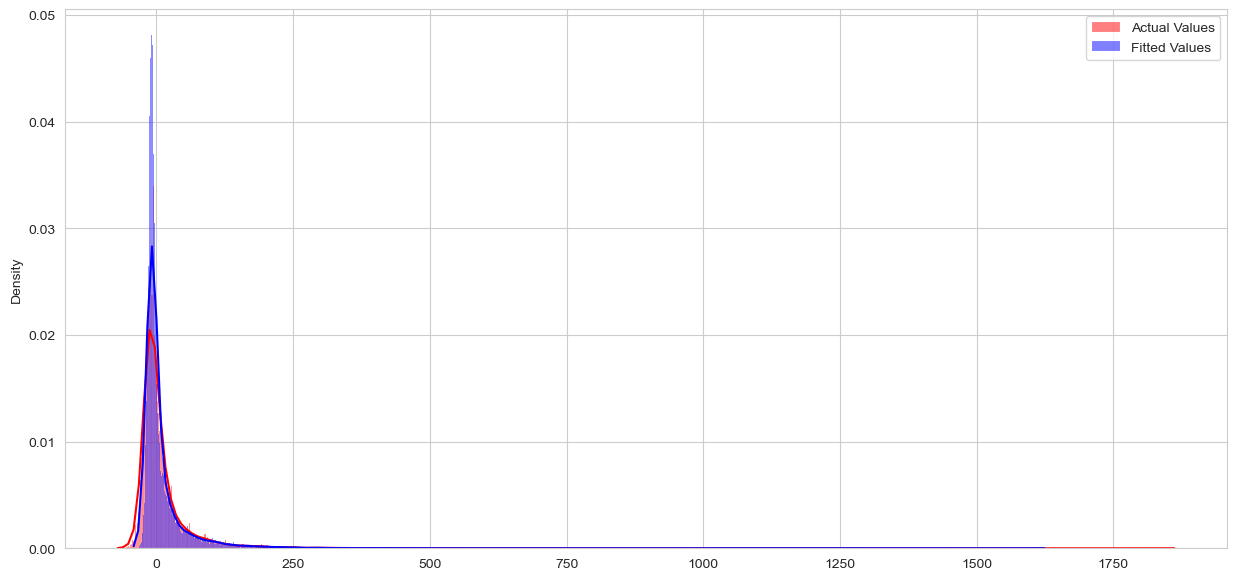

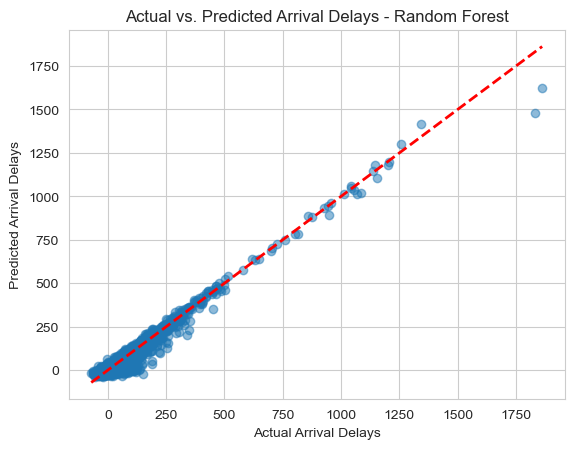

In [73]:
pred_mse = []
pred_rmse = []
pred_mae = []
pred_r2 = []

for i in range(1,5):
  sampled_df = arrDelay_df.sample(n=100000)

  X = np.array(sampled_df[['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime']])
  y = np.array(sampled_df['ArrDelay'])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create the random forest model and fit it to the training data
  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  pred_mse.append(mse)
  pred_rmse.append(rmse)
  pred_mae.append(mae)
  pred_r2.append(r2)


print("Mean Squared Error: ", pred_mse)
print("Root Mean Squared Error: ", pred_rmse)
print("Mean Absolute Error: ", pred_mae)
print("R-squared: ", pred_r2)

print("Mean of Mean Squared Error: ", np.mean(pred_mse))
print("Mean of Root Mean Squared Error: ", np.mean(pred_rmse))
print("Mean of Mean Absolute Error: ", np.mean(pred_mae))
print("Mean of R-squared: ", np.mean(pred_r2))

# The code creates a plot using seaborn library to visualize the distribution of actual and predicted values of a regression model, where y_test and y_pred are the actual and predicted values, respectively.
plt.figure(figsize=(15,7))
ax1 = sns.histplot(y_test, kde=True, stat="density", color='r', label='Actual Values')
sns.histplot(y_pred, kde=True, stat="density", color='b', label='Fitted Values', ax=ax1)
plt.legend()
plt.show()

# The below plot shows a Scatter plot of actual vs. predicted values of arrival delays
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Arrival Delays")
plt.ylabel("Predicted Arrival Delays")
plt.title("Actual vs. Predicted Arrival Delays - Random Forest")

# Add a diagonal line to represent perfect predictions
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)

plt.show()

### **XGBoost Model**

Mean Squared Error:  [285.00848698972806, 332.4104770156349, 383.51385764942864, 311.99641922522875]
Root Mean Squared Error:  [16.88219437720488, 18.23212760529157, 19.583509839899197, 17.663420371638917]
Mean Absolute Error:  [10.191058645556401, 10.134735777201879, 10.125214430557389, 10.055081694447122]
R-squared:  [0.9340664233722088, 0.9144340018439983, 0.9062748194626761, 0.9254238832757884]
Mean of Mean Squared Error:  328.2323102200051
Mean of Root Mean Squared Error:  18.09031304850864
Mean of Mean Absolute Error:  10.126522636940697
Mean of R-squared:  0.9200497819886679


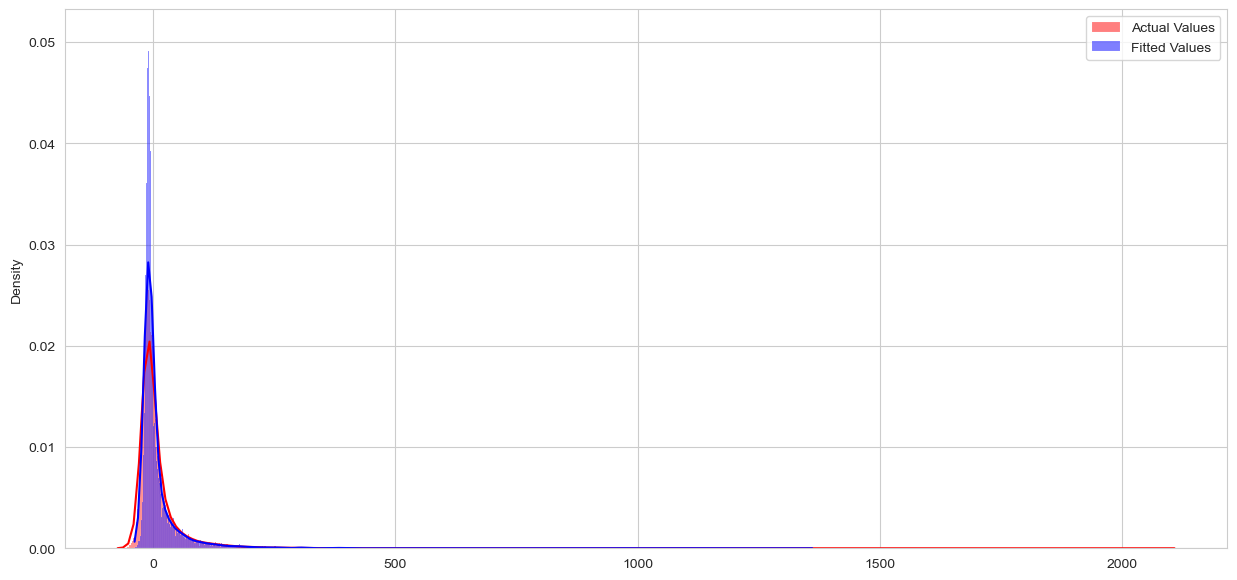

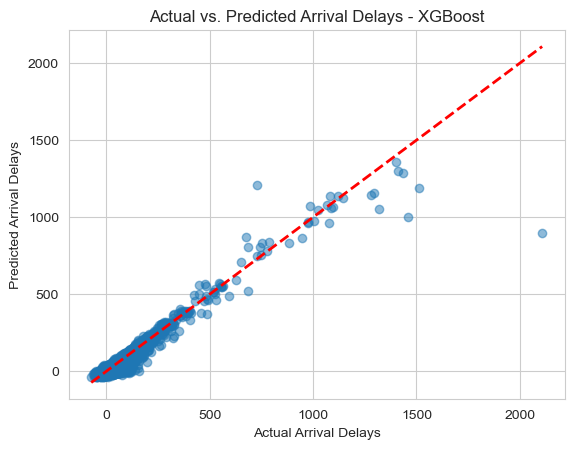

In [74]:
pred_mse = []
pred_rmse = []
pred_mae = []
pred_r2 = []

for i in range(1,5):
  sampled_df = arrDelay_df.sample(n=100000)
  X = np.array(sampled_df[['Month', 'DayofMonth', 'DayOfWeek', 'Distance', 'DistanceGroup', 'DepTime', 'CRSDepTime', 'DepDelay', 'DepartureDelayGroups', 'DepDelayMinutes', 'CRSArrTime', 'CRSElapsedTime']])
  y = np.array(sampled_df['ArrDelay'])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create the XGBoost model and fit it to the training data
  model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  pred_mse.append(mse)
  pred_rmse.append(rmse)
  pred_mae.append(mae)
  pred_r2.append(r2)


print("Mean Squared Error: ", pred_mse)
print("Root Mean Squared Error: ", pred_rmse)
print("Mean Absolute Error: ", pred_mae)
print("R-squared: ", pred_r2)

print("Mean of Mean Squared Error: ", np.mean(pred_mse))
print("Mean of Root Mean Squared Error: ", np.mean(pred_rmse))
print("Mean of Mean Absolute Error: ", np.mean(pred_mae))
print("Mean of R-squared: ", np.mean(pred_r2))

# The code creates a plot using seaborn library to visualize the distribution of actual and predicted values of a regression model, where y_test and y_pred are the actual and predicted values, respectively.
plt.figure(figsize=(15,7))
ax1 = sns.histplot(y_test, kde=True, stat="density", color='r', label='Actual Values')
sns.histplot(y_pred, kde=True, stat="density", color='b', label='Fitted Values', ax=ax1)
plt.legend()
plt.show()

# The below plot shows a Scatter plot of actual vs. predicted values of arrival delays
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Arrival Delays")
plt.ylabel("Predicted Arrival Delays")
plt.title("Actual vs. Predicted Arrival Delays - XGBoost")

# Add a diagonal line to represent perfect predictions
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', lw=2)

plt.show()